# Выпускная квалификационная работа по курсу «Data Science»

В ходе выполнения ВКР требуется сделать:

Изучить теоретические основы и методы решения поставленной задачи.
Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
Провести предобработку данных (удаление шумов, нормализация и т.д.).
Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.
Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании ранее (или Модуль упругости при растяжении, ГПа или 	Прочность при растяжении, МПа или Соотношение матрица-наполнитель).
Оценить точность модели на тренировочном и тестовом датасете. Создать профиль на github.com. Сделать commit приложения на github.com. Сделать commit на веб-хостинг (по желанию учащегося).
Создать репозиторий в GitHub и разместить там код исследования. Оформить файл README.

## Изучить теоретические основы и методы решения поставленной задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов. На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

## Провести разведочный анализ предложенных данных

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонки получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [1]:
# Пути для локального запуска
nb_path = ''
data_path = 'data/'
models_path = 'models/'

In [2]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
import pickle
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import models
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 3128

In [4]:
# Загружаю исходные данные из файла X_bp
X_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [5]:
# Загружаю исходные данные из файла X_nup
X_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

X_bp содержит индекс + 10 признаков и 1023 строк.

X_nup содержит индекс + 3 признака и 1040 строк

Рассмотрю список признаков:

In [6]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [7]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

По условиям известно, что это это единый набор данных, и он требует объединения с типом INNER. 

In [8]:
# Объединяю датасеты
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

В датасете осталось 1023 строки, часть строк из таблицы X_nup была удалена.

In [9]:
# Сохраню объединенные данные
df.to_excel(data_path + 'data_merged.xlsx')

## Разведочный анализ

Необходимо: 
* нарисовать гистограммы распределения каждой из переменной
* диаграммы ящика с усами
* попарные графики рассеяния точек
* для каждой колонке получить среднее и медианное значение
* провести анализ и исключение выбросов
* проверить наличие пропусков

### Шаг 1. Знакомство с данными

In [10]:
# Посмотрю типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Все признаки имеют тип float64, кроме угол нашивки (int64), признаков с типом "object" нет - значит нет строковых значений вместо чисел.

In [11]:
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

Объедененный датасет имеет 13 признаков и 1023 строки, 17 строк из таблицы X_nup была отброшено, что не является существенным.

Пропусков нет. Известно, что датасет уже подготовлен. Поэтому отсутствие пропусков и значений ошибочных типов подтверждает подготовленность данных.

**Описательная статистика**

In [12]:
# Посмотрю описательную статистику
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

Описательная статистика содержит по каждому столбцу (по каждой переменной):
*   count - количество значений
*   mean - среднее значение
*   std - стандартное отклонение
*   min - минимум
*   25% - верхнее значение первого квартиля
*   50%	- медиана
*   75% - верхнее значение третьего квартиля
*   max - максимум

### Шаг 2. Пропуски данных

In [13]:
# Проверю на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [14]:
# если бы были пропуски, то вывел из так
missing = df.isnull().sum()
if missing.sum() > 0:
    print("Найдены пропуски:")
    print(missing[missing > 0])
else:
    print("Пропусков нет.")

Пропусков нет.


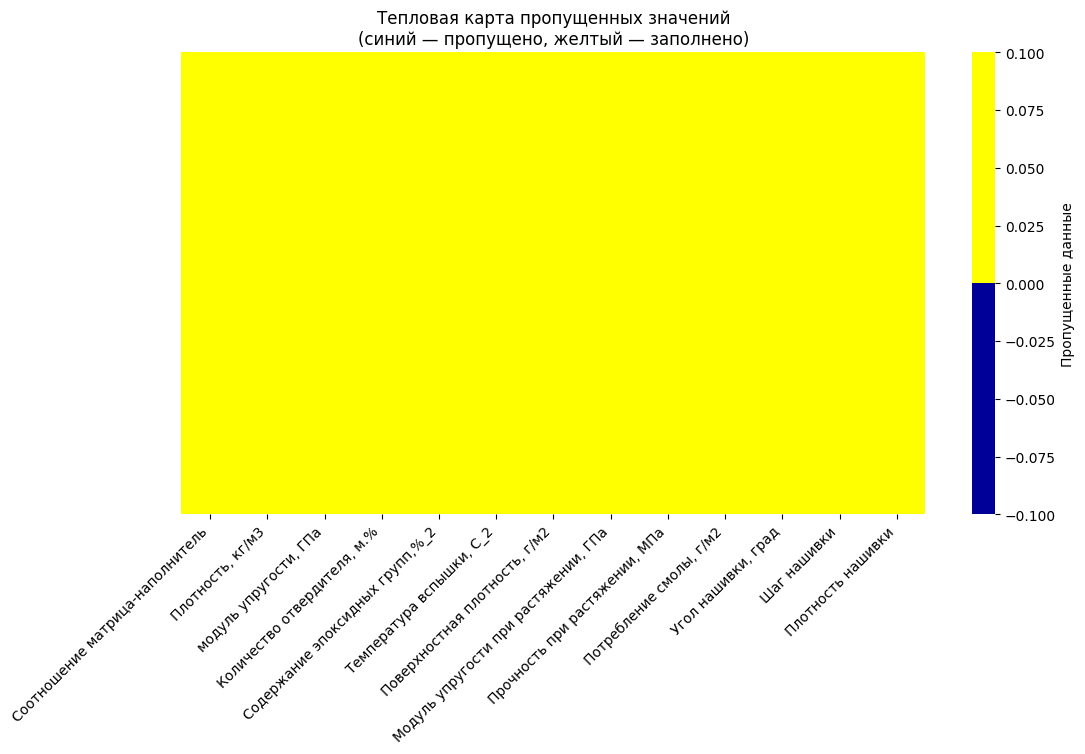

In [15]:
cols = df.columns
# Создаём маску пропущенных значений
missing_mask = df.isnull()
# Определяем цвета: [цвет для False (нет пропуска), цвет для True (пропуск)]
colours = ['#000099', '#ffff00']  # синий → жёлтый
# Строим heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    missing_mask,
    cmap=sns.color_palette(colours),
    cbar_kws={'label': 'Пропущенные данные'},
    yticklabels=False  # убираем метки строк для больших данных
)
# Добавляем пояснение
plt.title('Тепловая карта пропущенных значений\n(синий — пропущено, желтый — заполнено)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Шаг 3. Дубликаты и уникальные значения

In [16]:
df.duplicated().sum()

np.int64(0)

дубликатов данных нет

In [17]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

### Шаг 4. Гистограммы распределения каждой из переменной

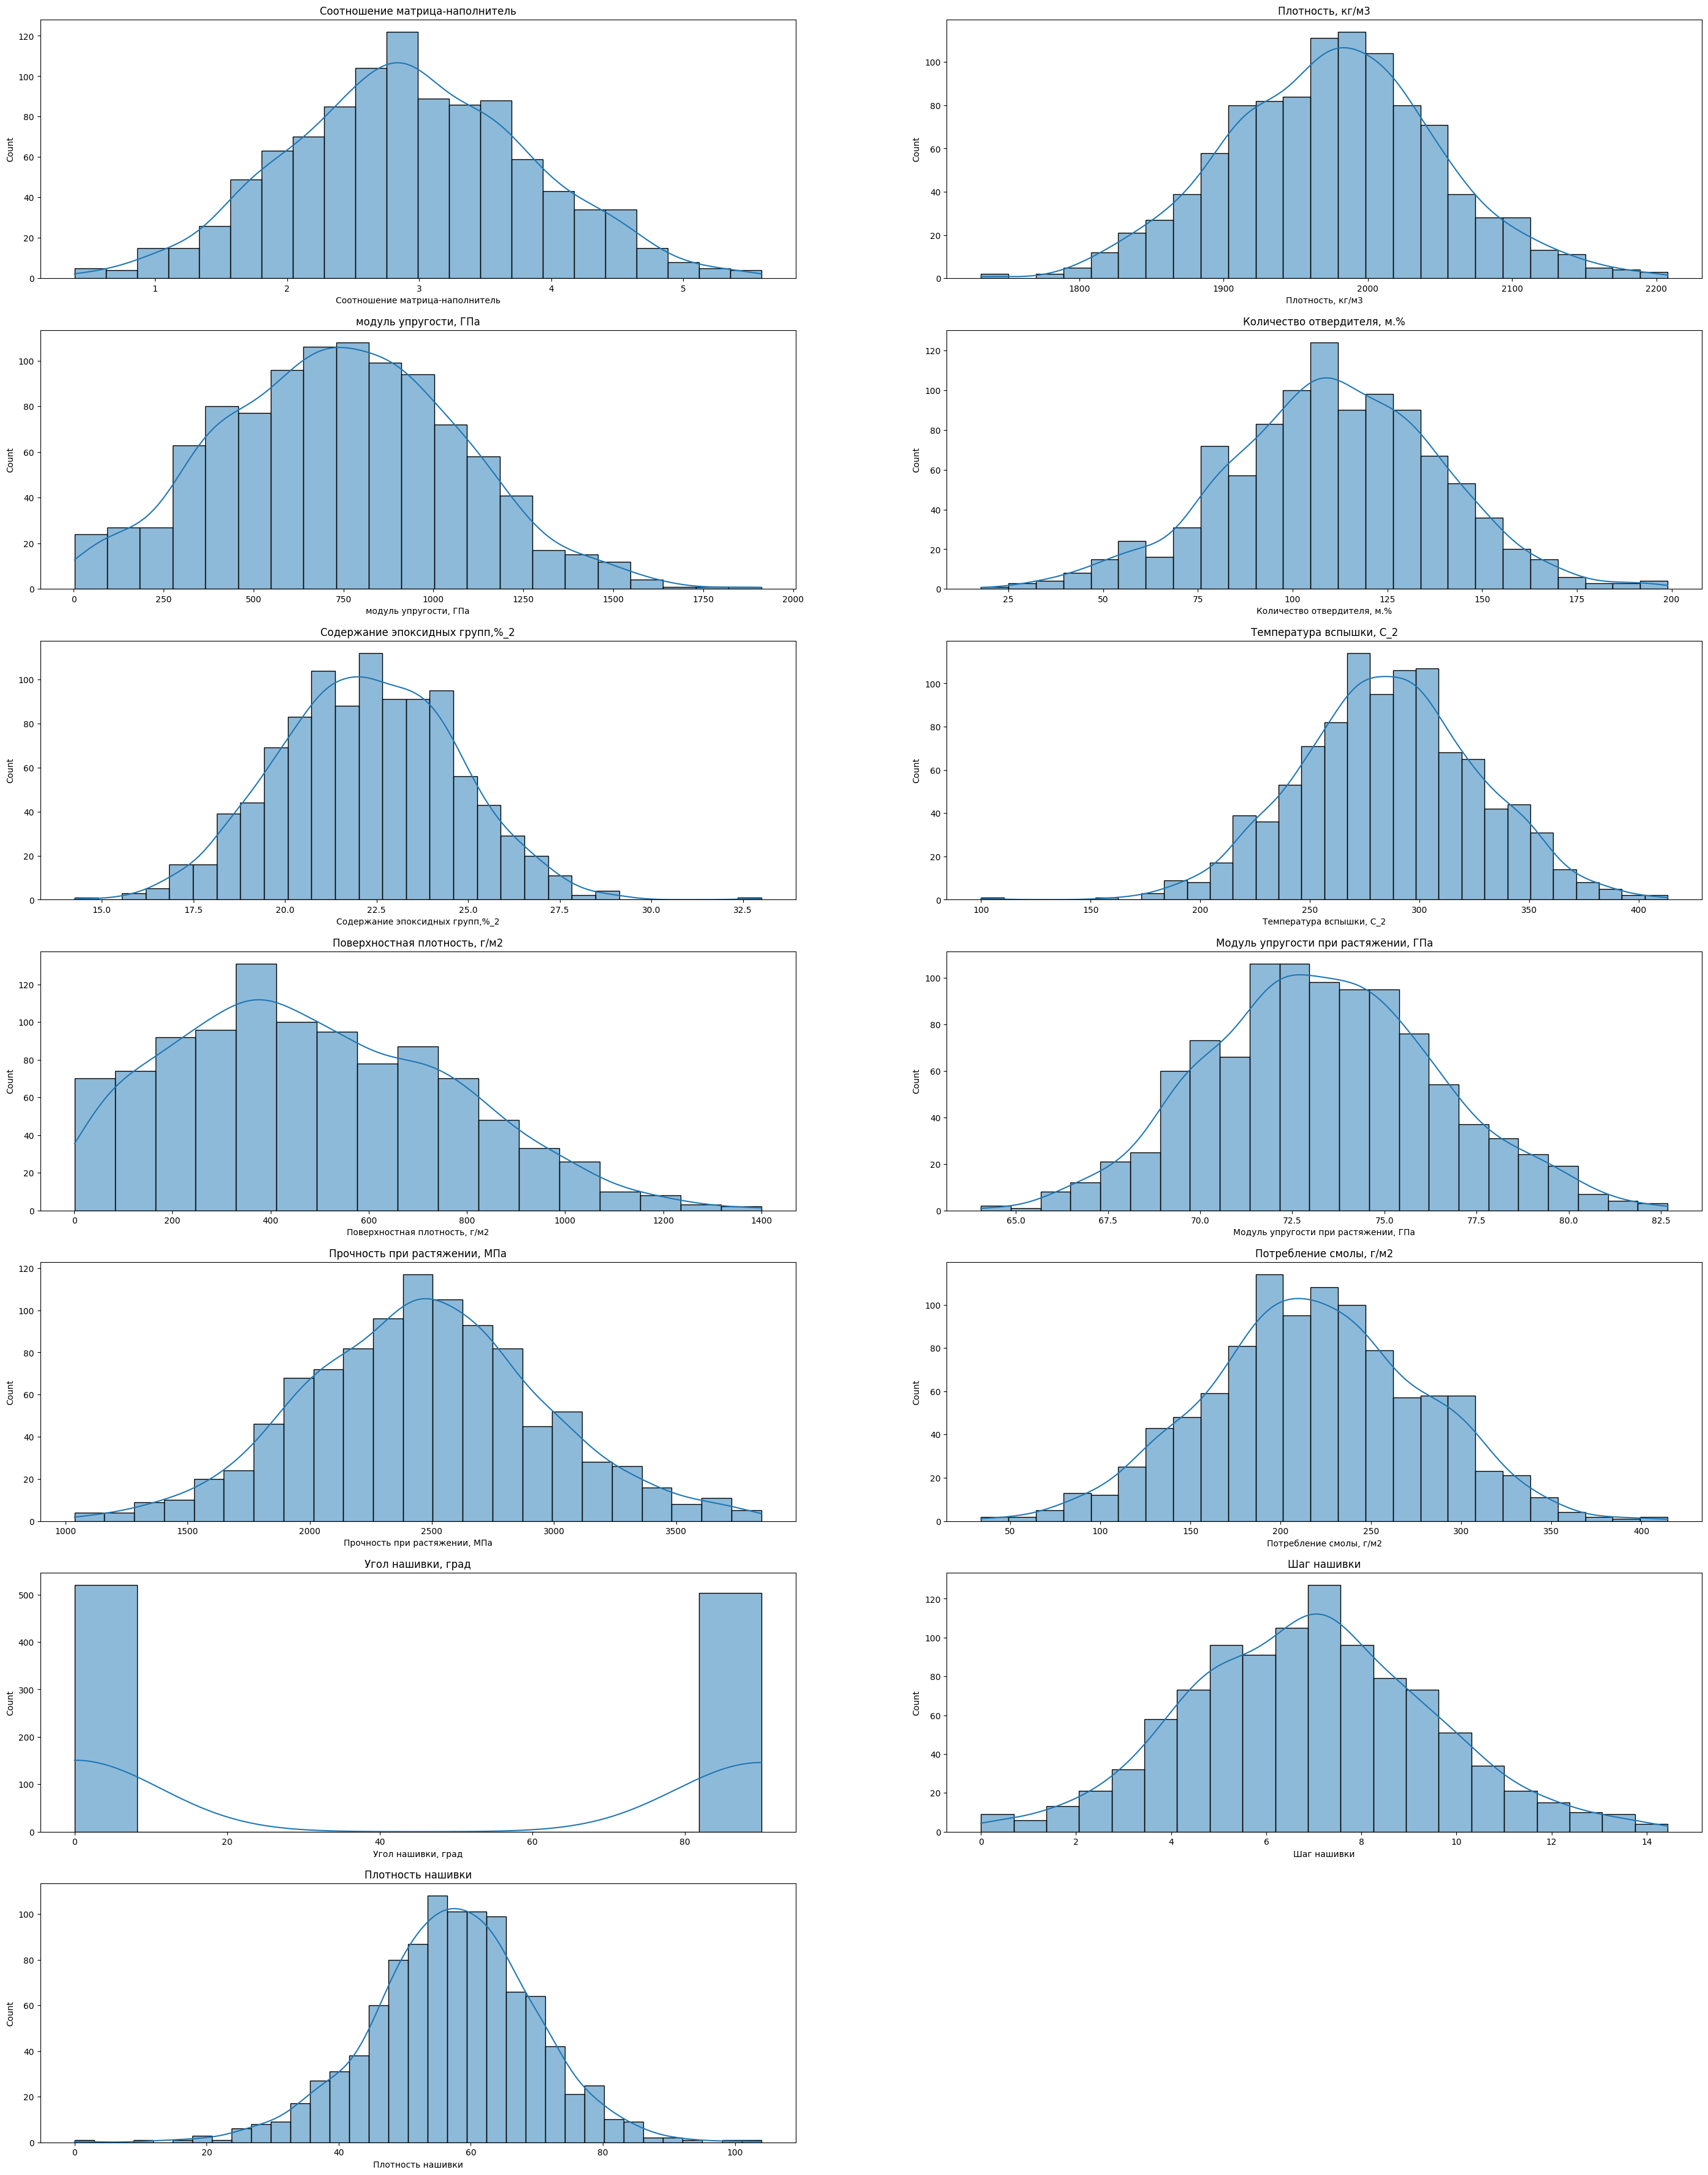

In [18]:
# Построю графики распределения переменных 
a = 7  # количество строк
b = 2  # количество столцбцов
c = 1  # инициализация plot counter

fig = plt.figure(figsize=(35, 45))

for i in df.columns:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.histplot(df[i], kde=True,)
    c = c + 1
   
plt.show()

По гистограмме видно, что есть ярко выбросы в столбцах Плотность, содержание эпоксидных групп, температура вспышки, плотность нашивки.
Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение. Они количественные, вещественные. Принимают неотрицательные значения. "Угол нашивки, град" принимает 2 значения (0 или 90). Можно превратить в бинарный признак. По имеющимся данным что датасет был предварительно подготовлен заказчиком. 

### Шаг 5. Диаграммы ящика с усами

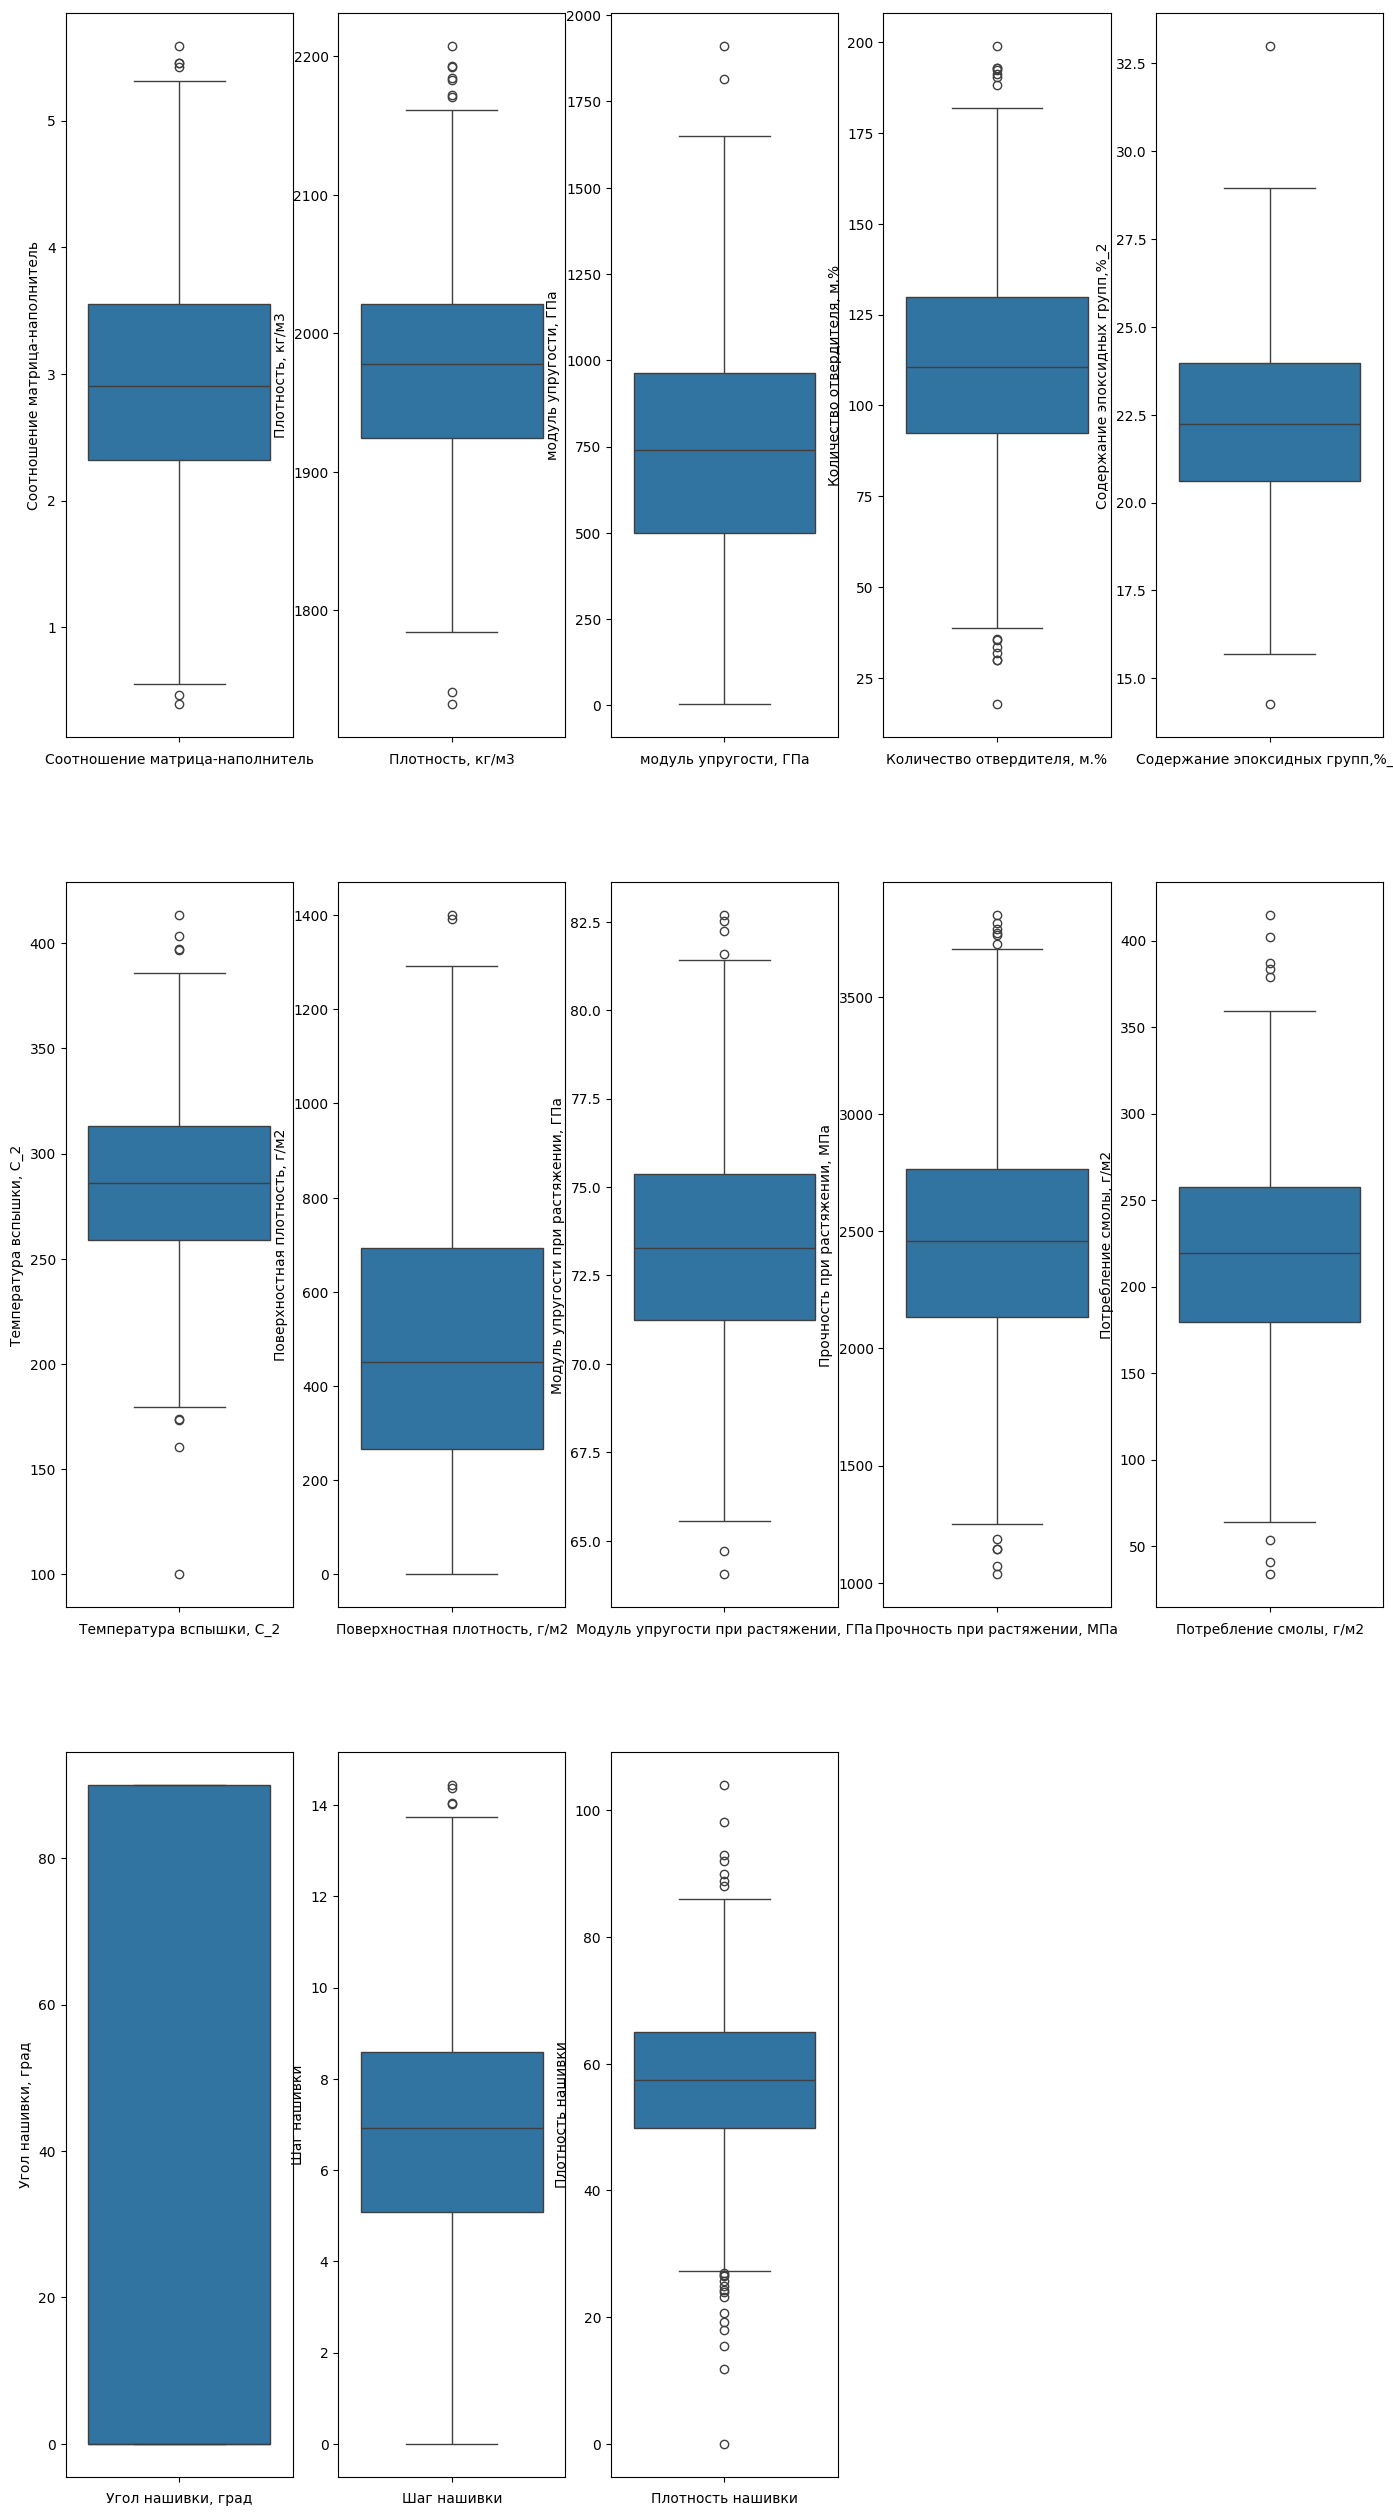

In [19]:
a = 3  # количество строк
b = 5  # количество столцбцов
c = 1  # инициализация plot counter

fig = plt.figure(figsize=(17, 32))

for i in df.columns:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.boxplot(y = df[i])
    c = c + 1
   
plt.show()

Ящик с усами показывает, что выбросы есть во всех показателях, кроме углов нашивки.

### Шаг 6. Построить попарные графики рассеяния точек

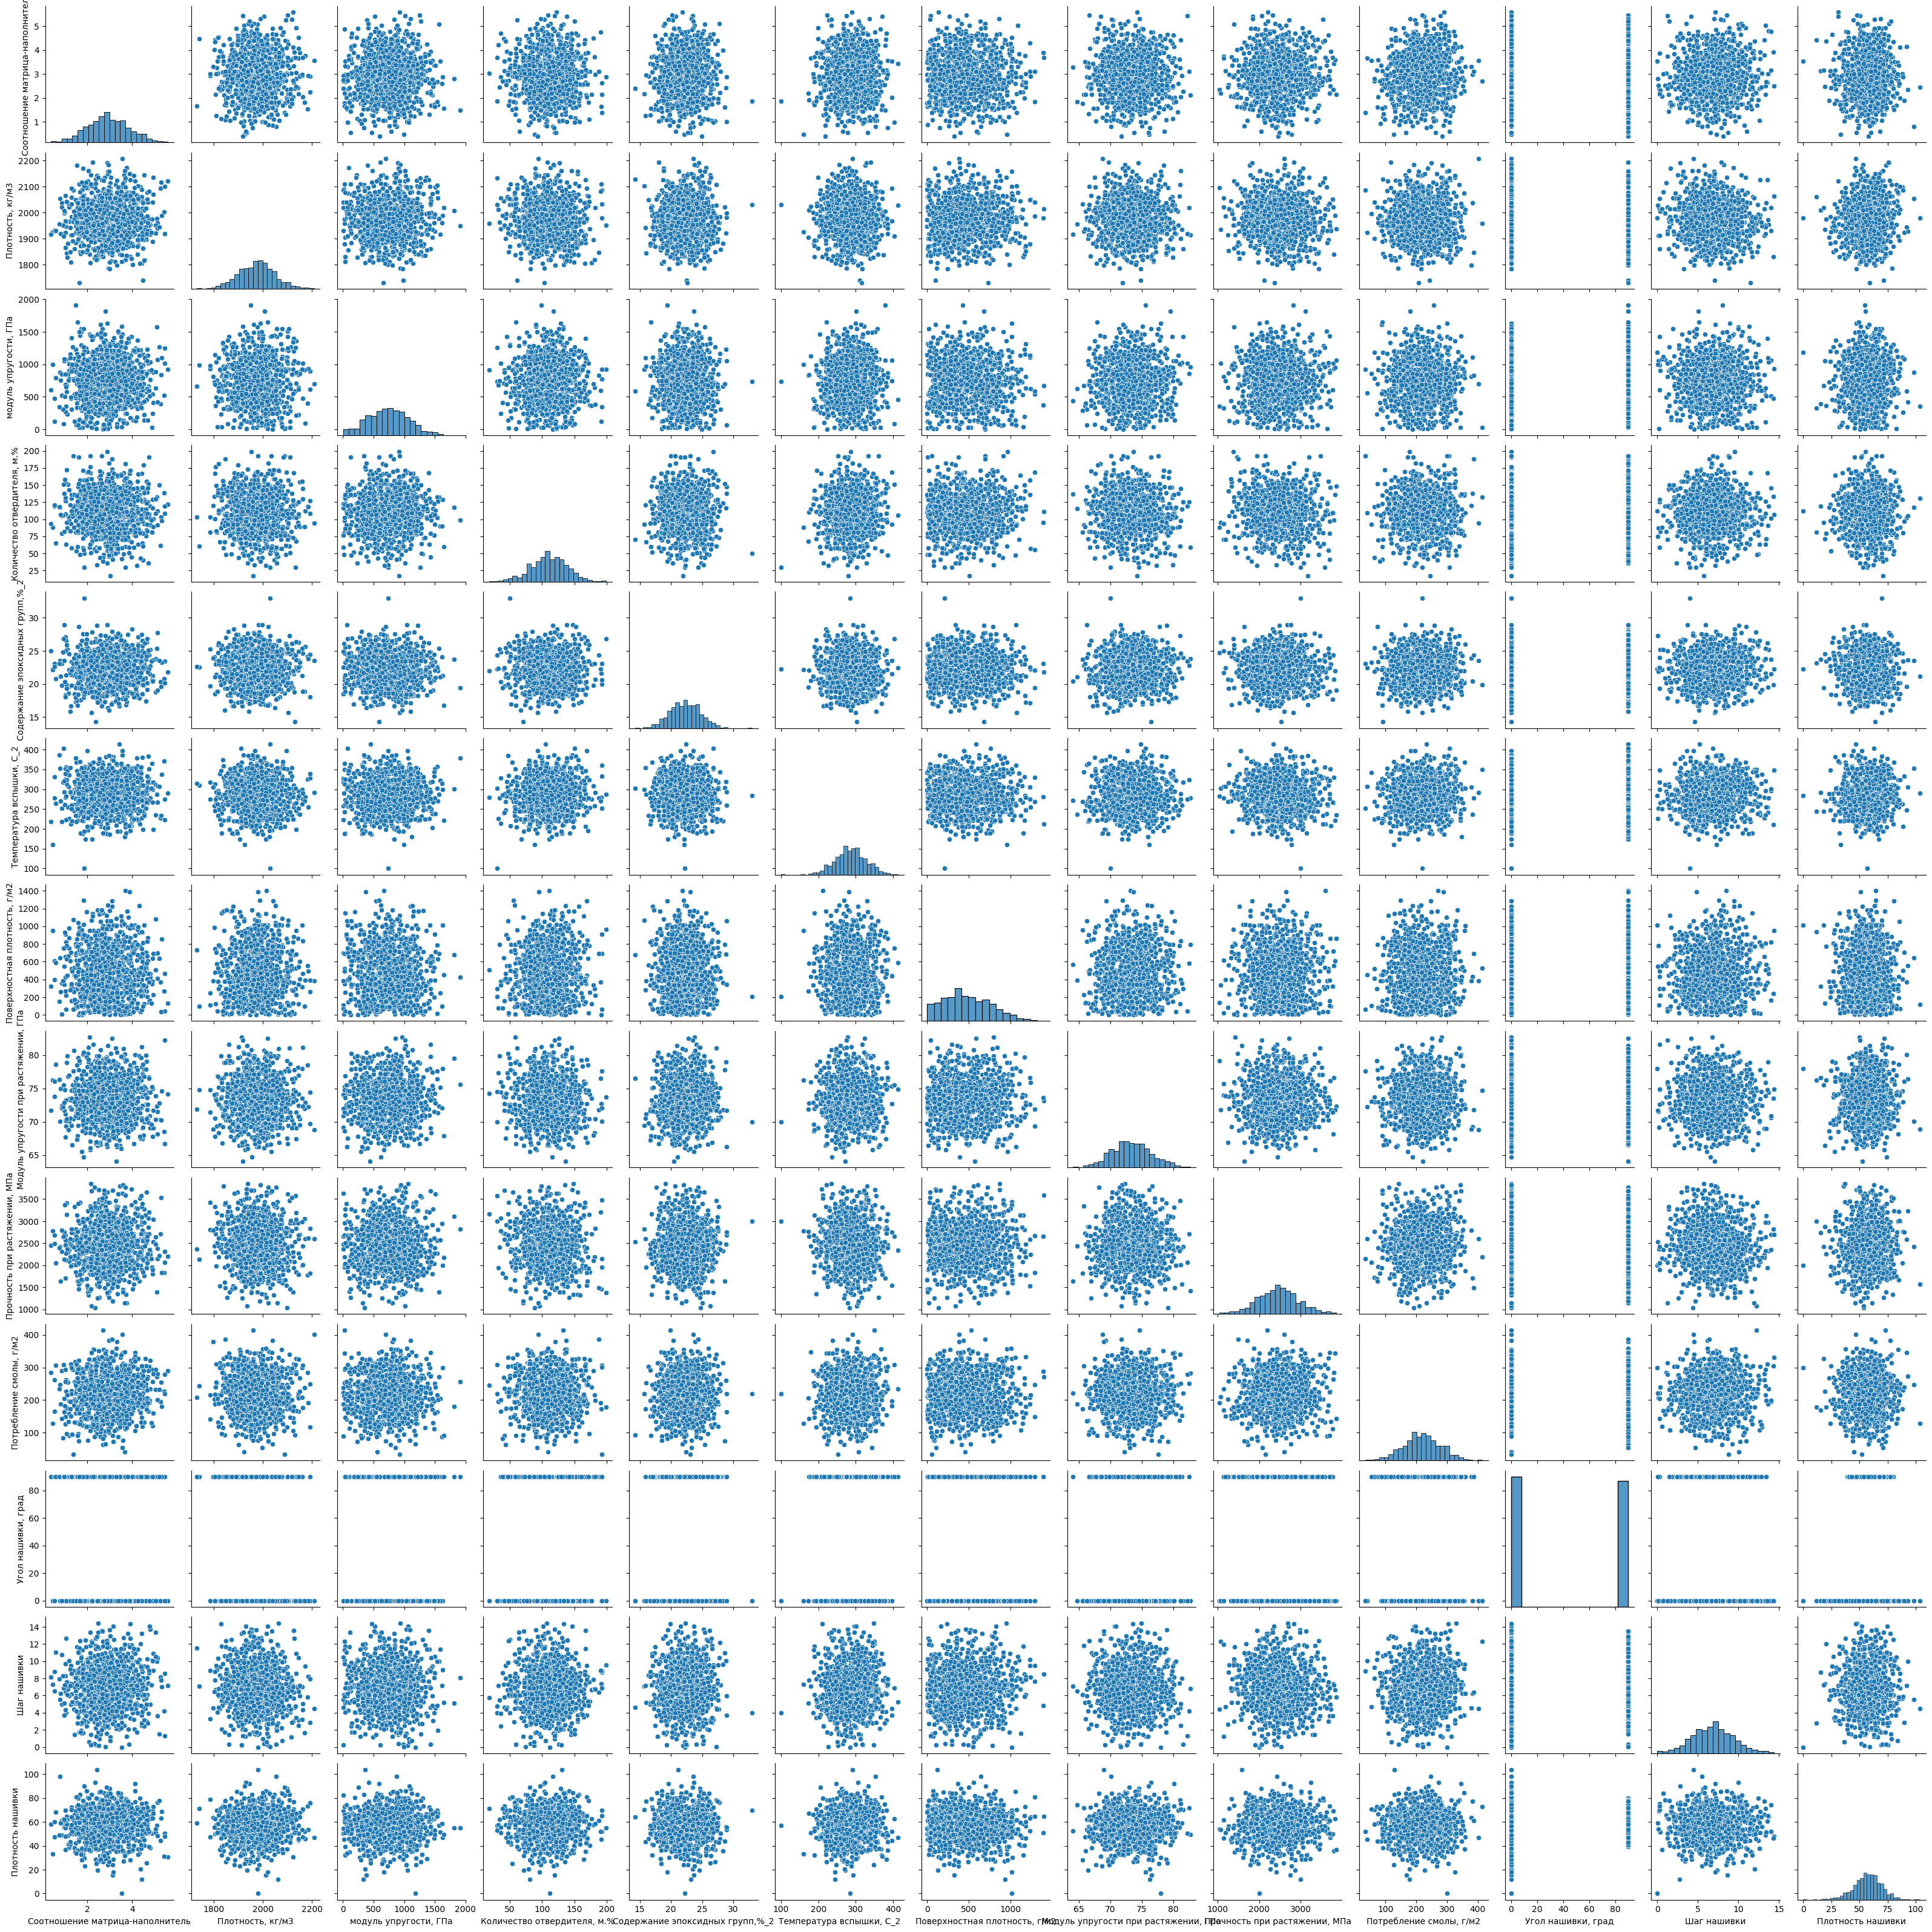

In [20]:
sns_plot = sns.pairplot(df[df.columns])
sns_plot.savefig('pair_plot.png')

* попарное сравнение какой-либо корреляции между признаками нет.
* из графиков видно, что выбросы есть. Некоторые точки стоят очень далеко от общего облака

### Шаг 7. Рассчитать среднее, медианное значение для каждой колонки

Среднее значение

In [21]:
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

медианное значение

In [22]:
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

### Шаг 8. Провести анализ

<Axes: >

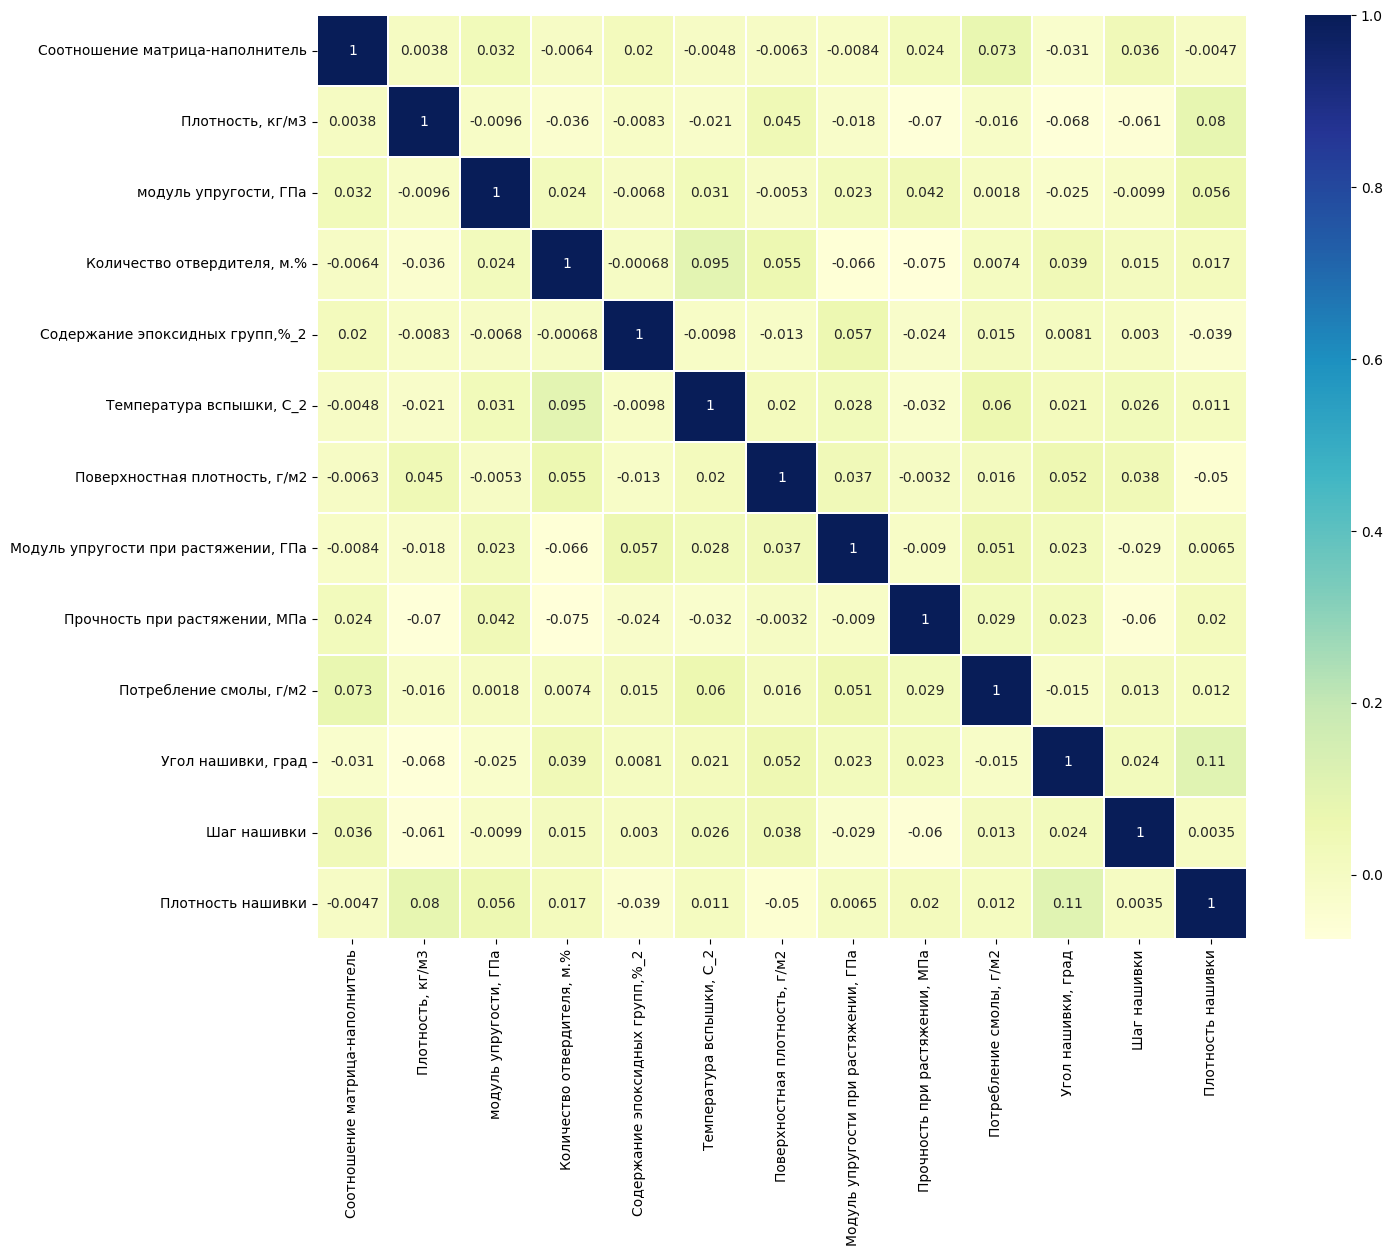

In [23]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(15, 12))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)

Корреляция очень слабая, можно сказать отсутствует. Можно выделить слабую корреляцию между "Плотностью нашивки" и "углом нашивки"

## Предобработка данных

Для удаления выбросов существует два основных метода - метод трех сигм или межквартильных расстояний. Рассмотрим эти два метода.

Соотношение матрица-наполнитель: 3s=0 iq=6


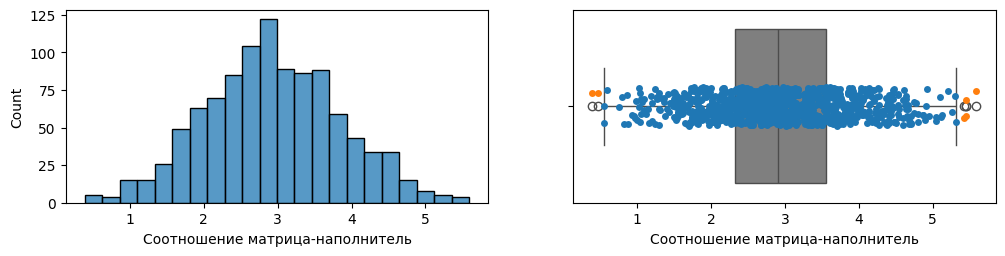

Плотность, кг/м3: 3s=3 iq=9


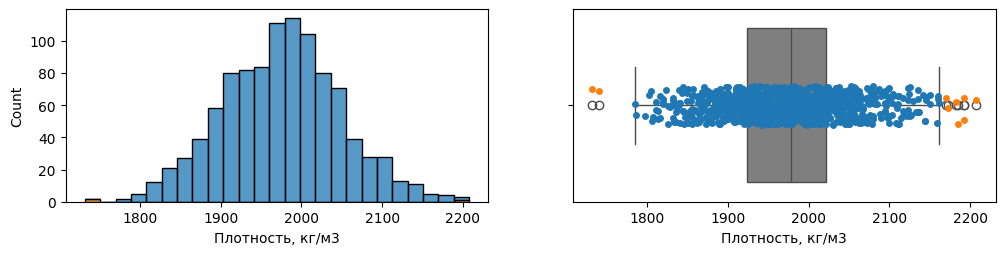

модуль упругости, ГПа: 3s=2 iq=2


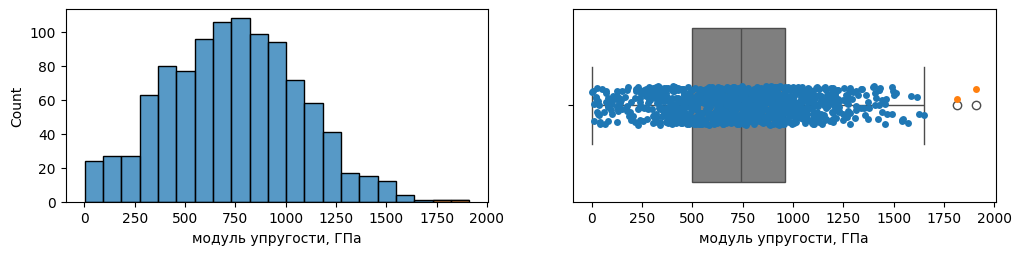

Количество отвердителя, м.%: 3s=2 iq=14


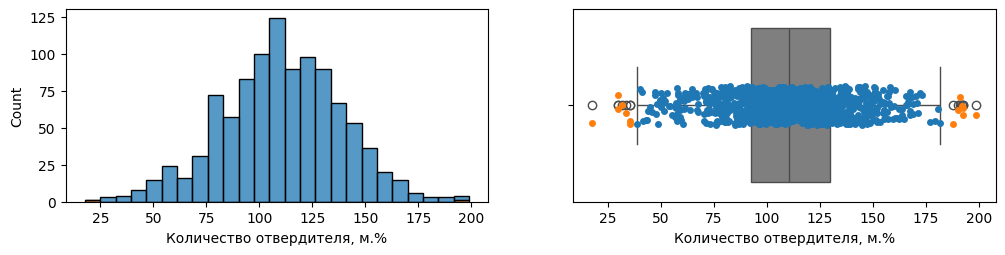

Содержание эпоксидных групп,%_2: 3s=2 iq=2


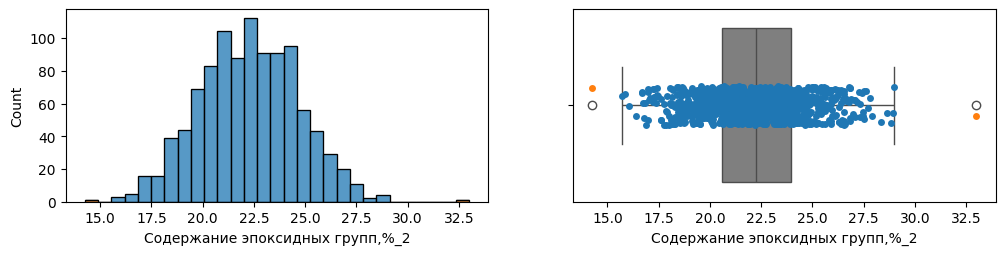

Температура вспышки, С_2: 3s=3 iq=8


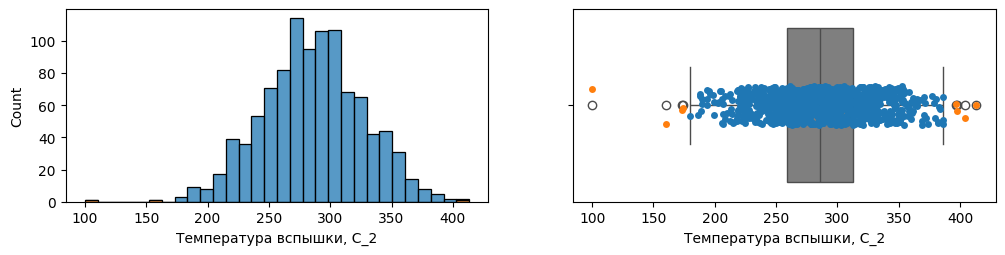

Поверхностная плотность, г/м2: 3s=2 iq=2


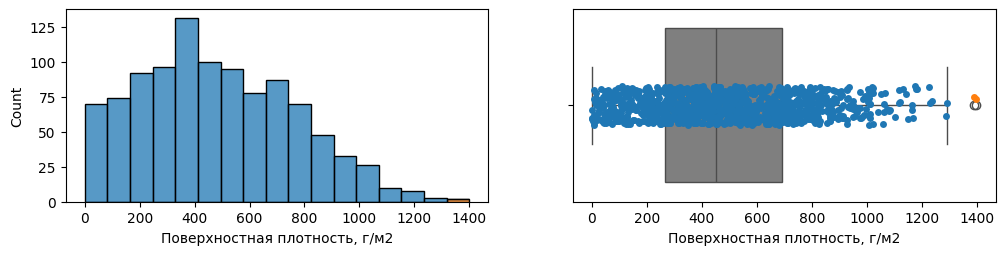

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


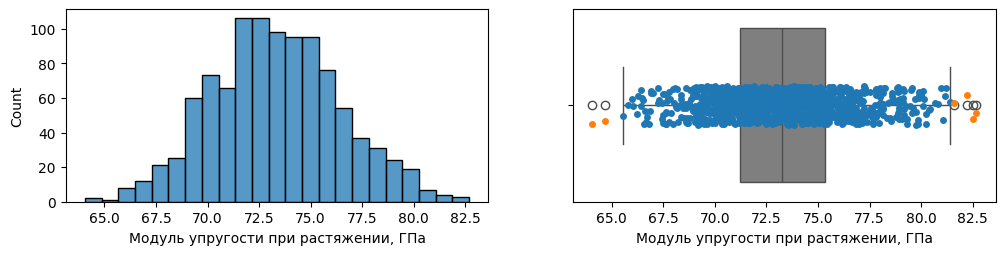

Прочность при растяжении, МПа: 3s=0 iq=11


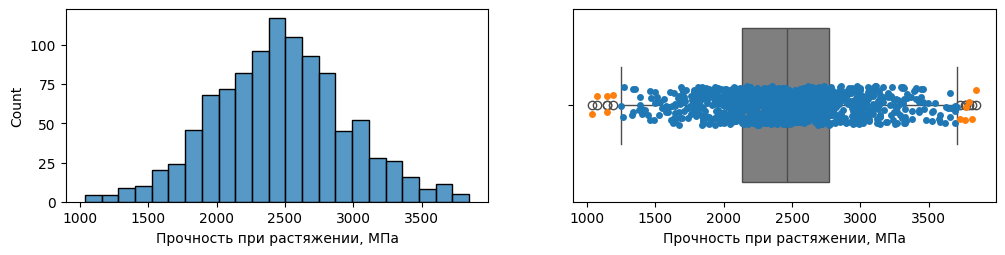

Потребление смолы, г/м2: 3s=3 iq=8


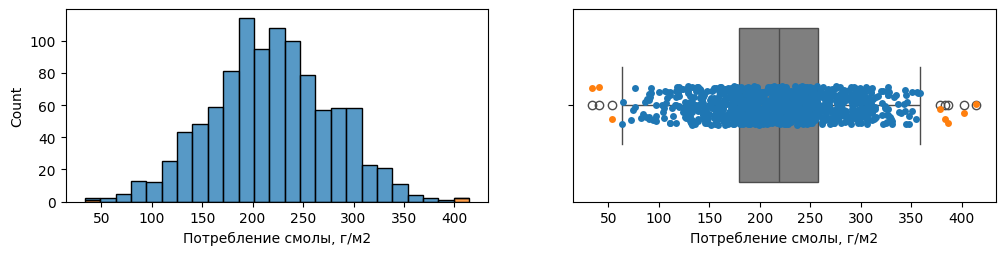

Угол нашивки, град: 3s=0 iq=0


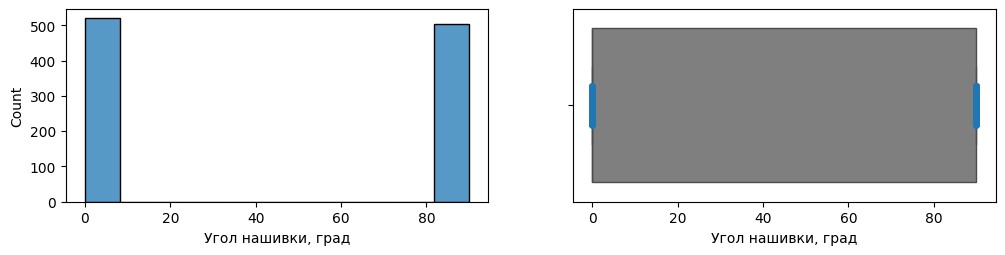

Шаг нашивки: 3s=0 iq=4


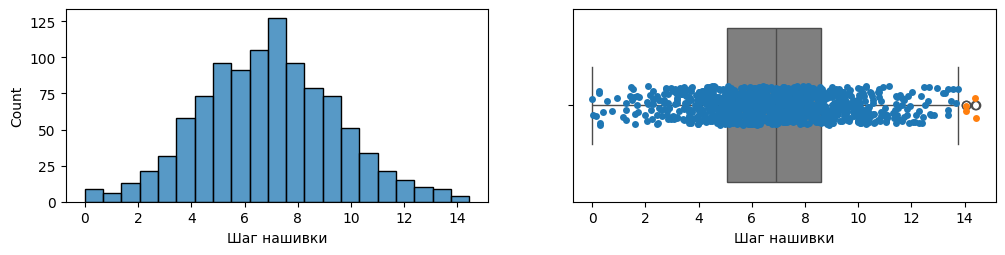

Плотность нашивки: 3s=7 iq=21


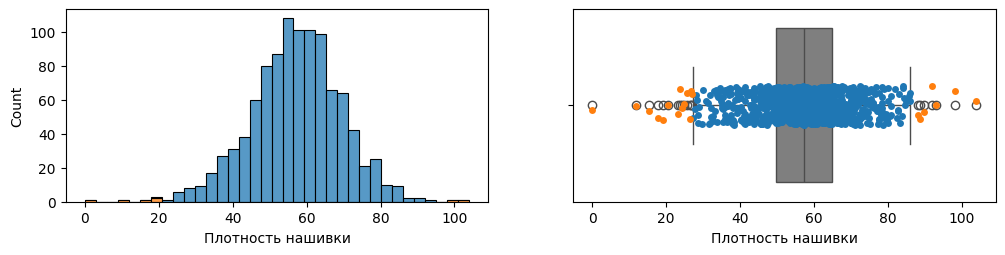

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [24]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Вот что получилось:
* Метод 3-х сигм, выбросов по всем переменным: 24
* Метод межквартильных расстояний, выбросов по всем переменным: 93
Применяем метод межквартильных расстояний, чтобы получить более "чистые" данные. 

Посчитаем распределение выбросов по признакам для того, чтобы не допустить ошибки и не удалить особенности признака. 

In [25]:
# Удалить выбросы методом межквартильных расстояний
outliers = pd.DataFrame(index=df.index)
for column in df:
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    ##zscore = (df[column] - df[column].mean()) / df[column].std()
    ##outliers[column] = (zscore.abs() > 3)
    outliers[column] = (df[column] <= lower) | (df[column] >= upper)
df = df[outliers.sum(axis=1)==0]
df.shape

(936, 13)

Продолжим очистку данных

Соотношение матрица-наполнитель: 3s=0 iq=0


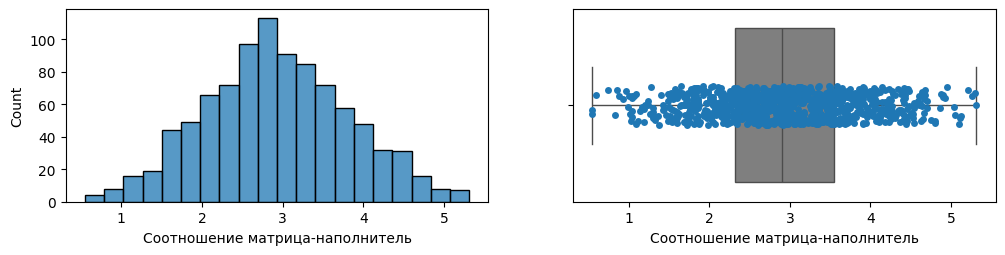

Плотность, кг/м3: 3s=0 iq=0


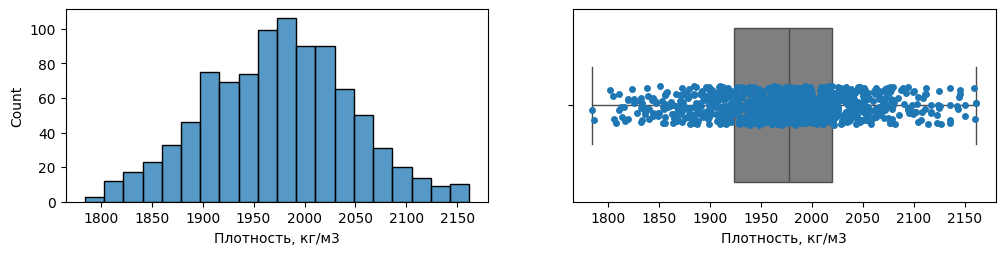

модуль упругости, ГПа: 3s=0 iq=1


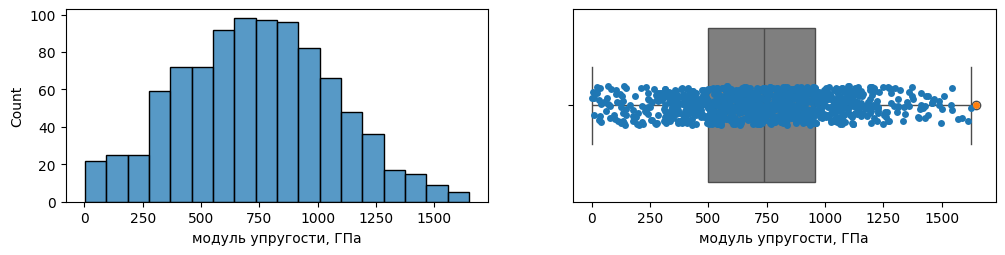

Количество отвердителя, м.%: 3s=0 iq=0


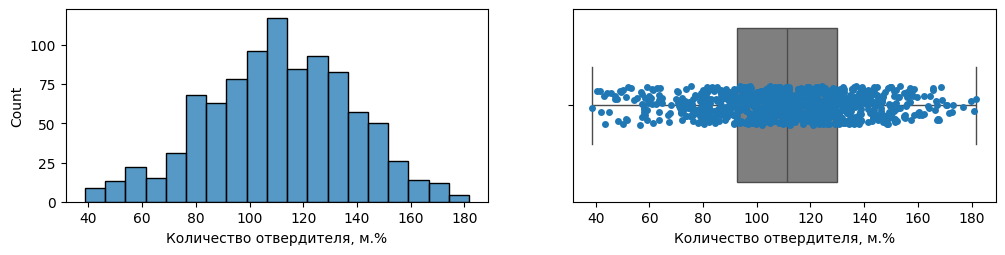

Содержание эпоксидных групп,%_2: 3s=0 iq=0


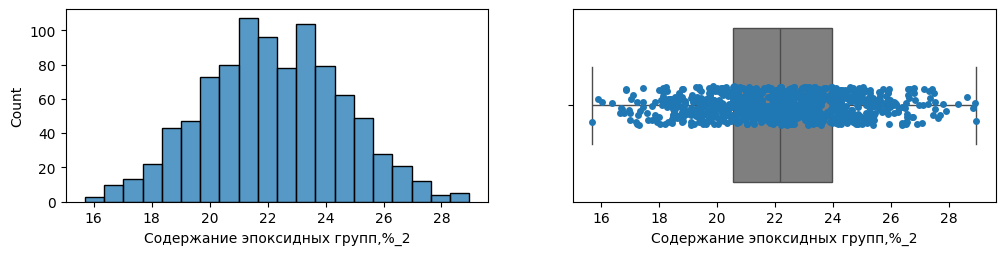

Температура вспышки, С_2: 3s=0 iq=0


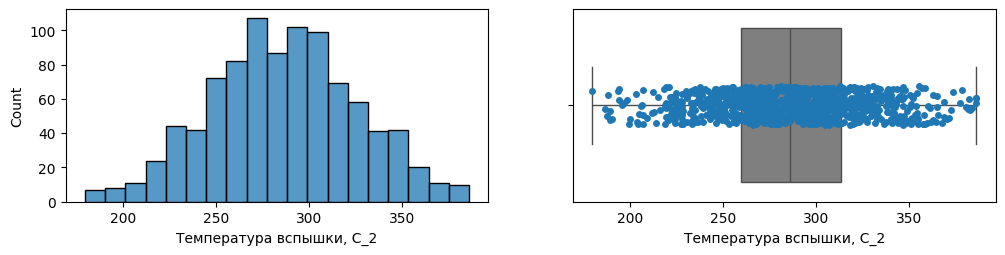

Поверхностная плотность, г/м2: 3s=0 iq=0


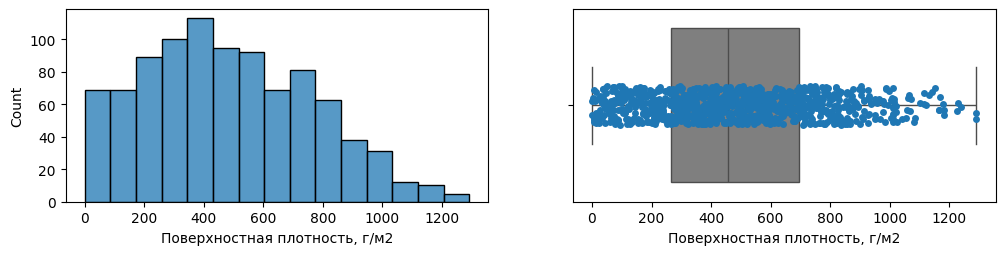

Модуль упругости при растяжении, ГПа: 3s=0 iq=1


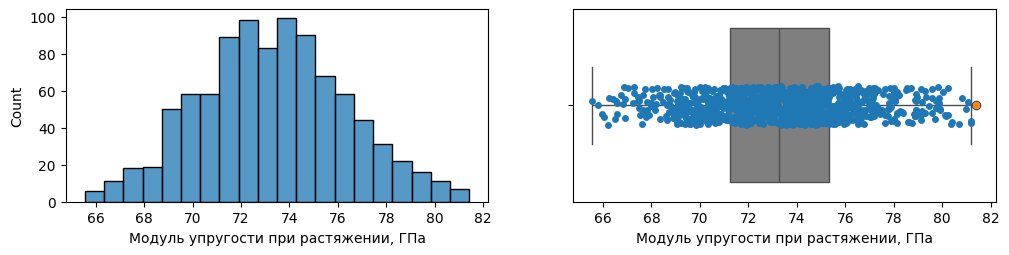

Прочность при растяжении, МПа: 3s=0 iq=4


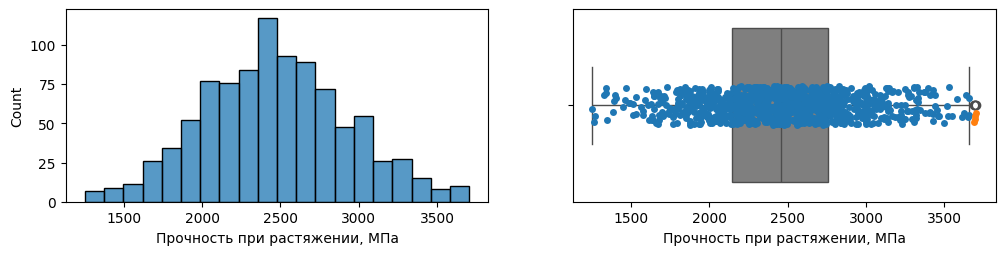

Потребление смолы, г/м2: 3s=0 iq=1


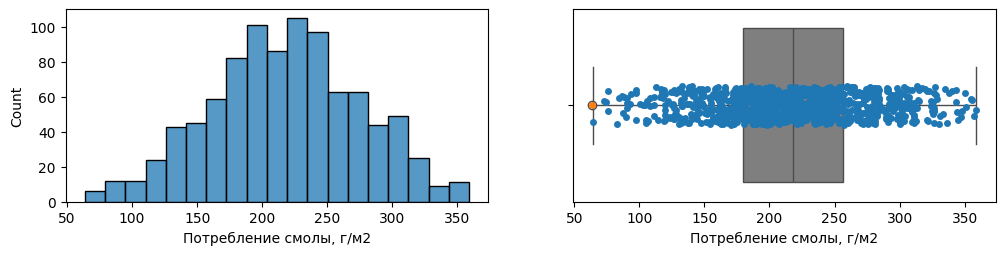

Угол нашивки, град: 3s=0 iq=0


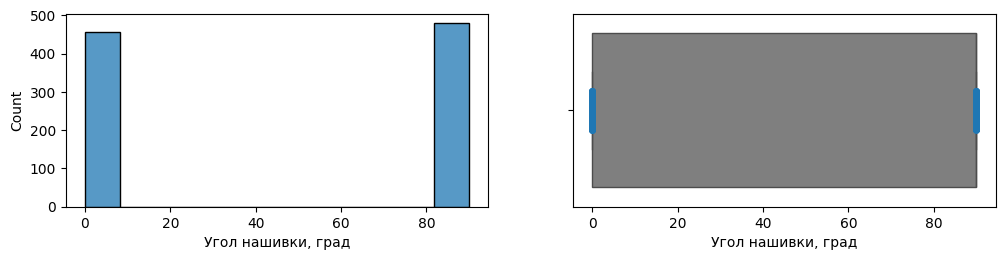

Шаг нашивки: 3s=0 iq=0


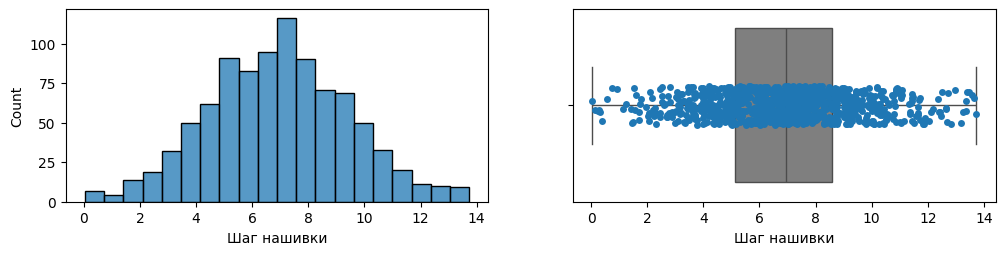

Плотность нашивки: 3s=0 iq=3


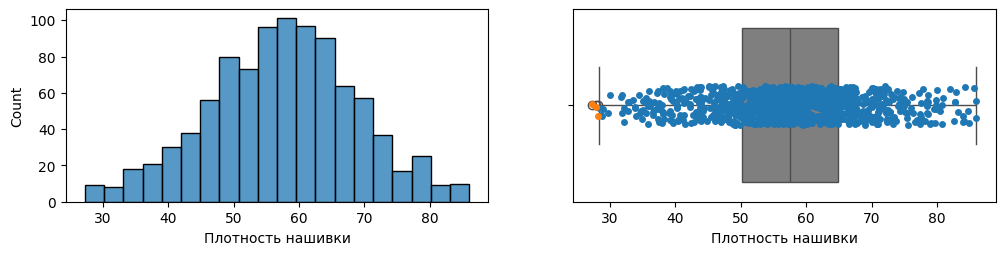

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 10


In [26]:
#Построим "ящики с усами" и наблюдаем все еще наличие выбросов
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

После удаления выбросов видно, что остается еще 10 выбросов, которые следует удалить.

In [27]:
# Удалить выбросы методом межквартильных расстояний
outliers = pd.DataFrame(index=df.index)
for column in df:
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    ##zscore = (df[column] - df[column].mean()) / df[column].std()
    ##outliers[column] = (zscore.abs() > 3)
    outliers[column] = (df[column] <= lower) | (df[column] >= upper)
df = df[outliers.sum(axis=1)==0]
df.shape

(926, 13)

Соотношение матрица-наполнитель: 3s=0 iq=0


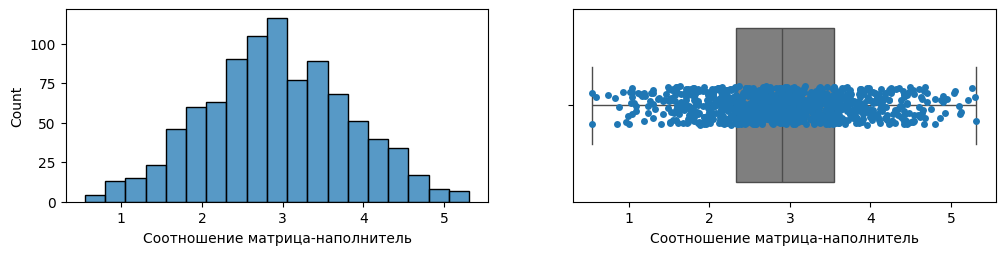

Плотность, кг/м3: 3s=0 iq=0


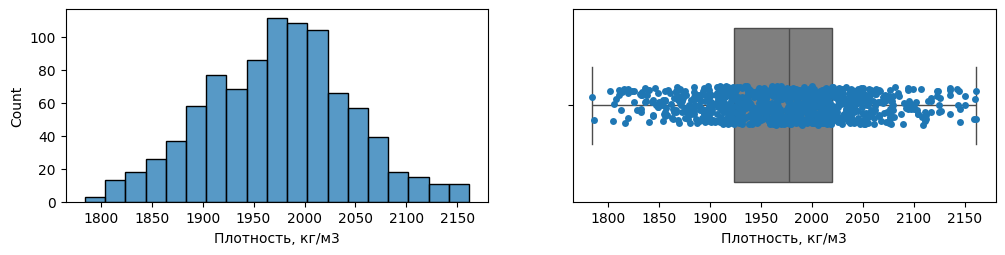

модуль упругости, ГПа: 3s=0 iq=0


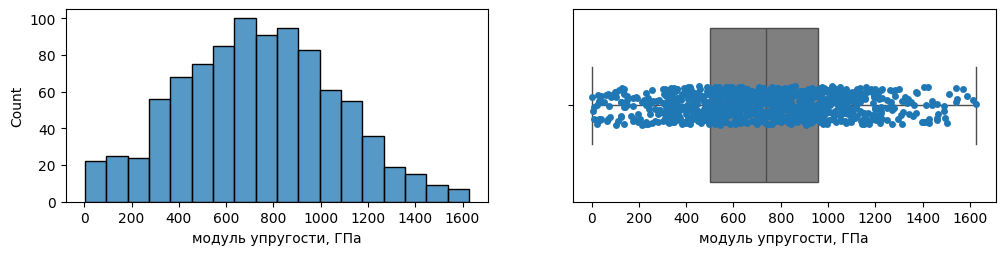

Количество отвердителя, м.%: 3s=0 iq=0


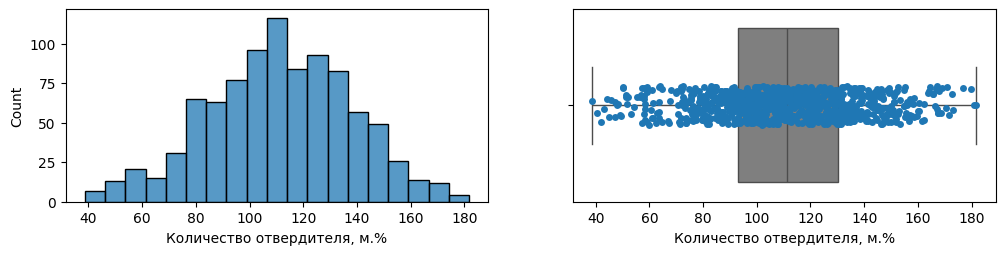

Содержание эпоксидных групп,%_2: 3s=0 iq=0


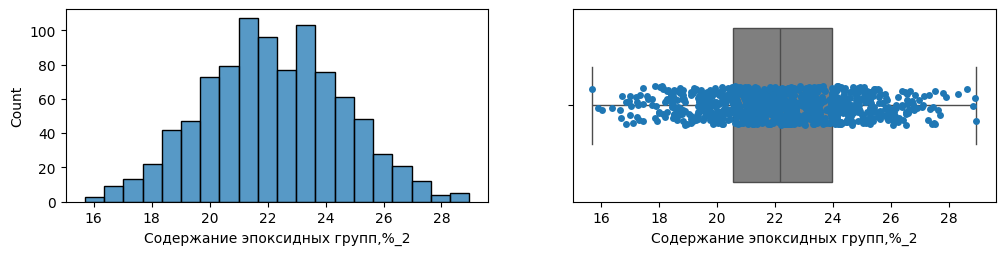

Температура вспышки, С_2: 3s=0 iq=0


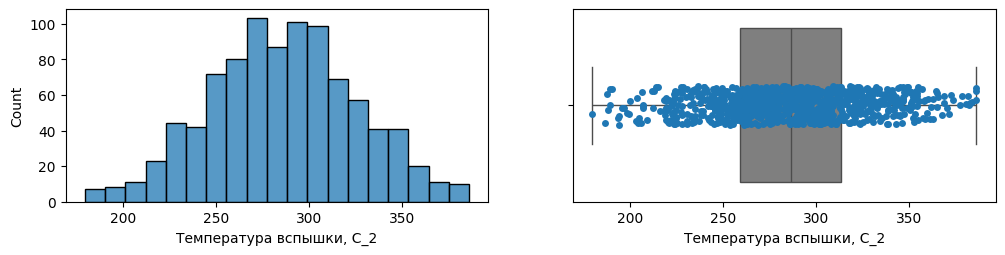

Поверхностная плотность, г/м2: 3s=0 iq=0


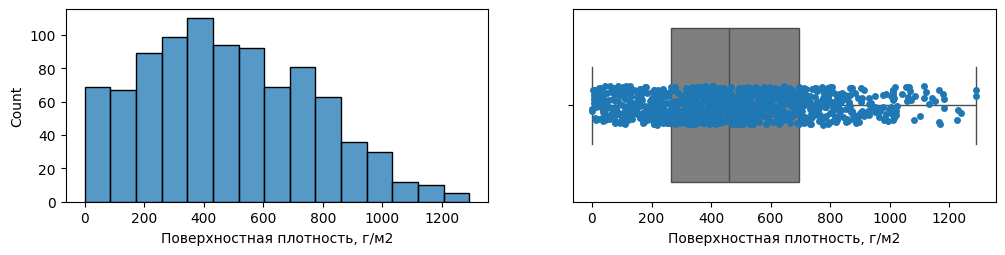

Модуль упругости при растяжении, ГПа: 3s=0 iq=0


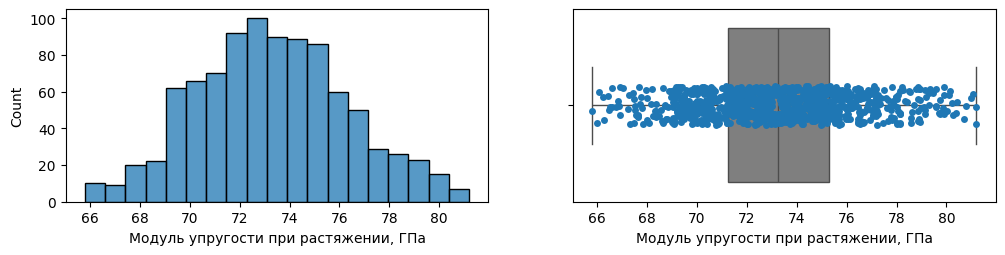

Прочность при растяжении, МПа: 3s=0 iq=2


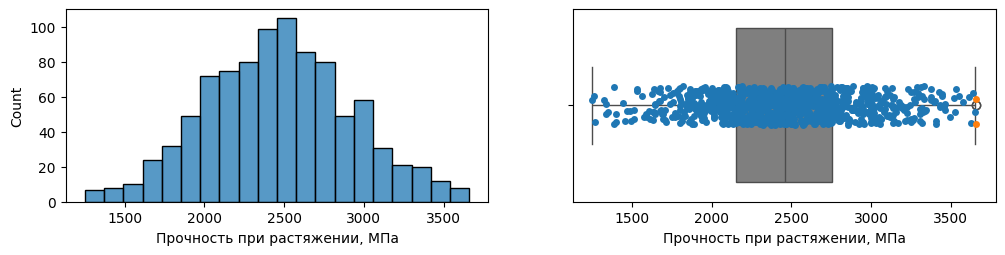

Потребление смолы, г/м2: 3s=0 iq=1


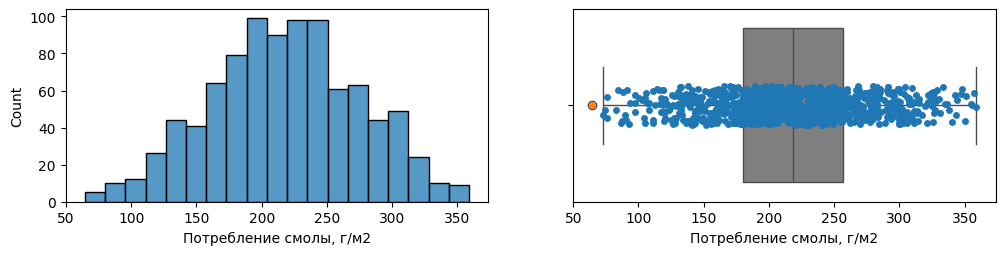

Угол нашивки, град: 3s=0 iq=0


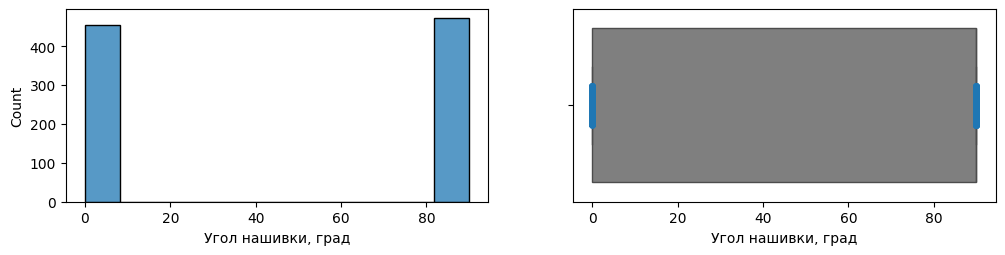

Шаг нашивки: 3s=0 iq=0


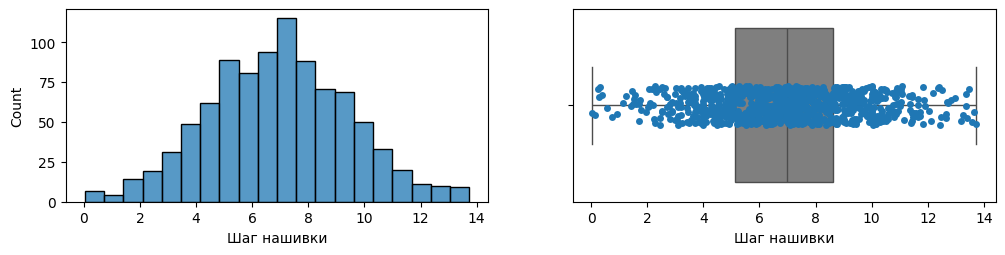

Плотность нашивки: 3s=0 iq=1


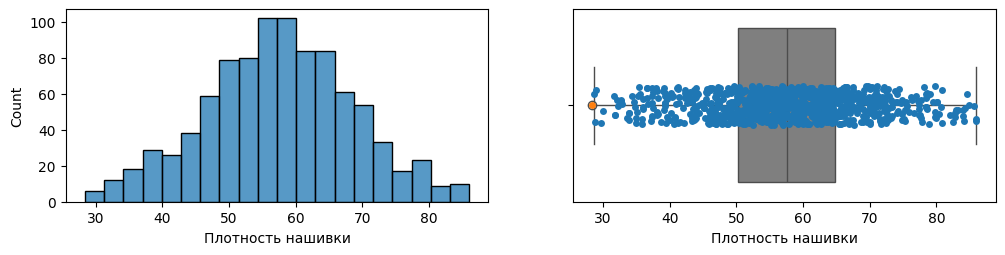

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 4


In [28]:
#Построим "ящики с усами" еще раз и наблюдаем все еще наличие выбросов
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Остается еще 4 выброса, которые снова удаляем.

In [29]:
# Удалить выбросы методом межквартильных расстояний
outliers = pd.DataFrame(index=df.index)
for column in df:
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    ##zscore = (df[column] - df[column].mean()) / df[column].std()
    ##outliers[column] = (zscore.abs() > 3)
    outliers[column] = (df[column] <= lower) | (df[column] >= upper)
df = df[outliers.sum(axis=1)==0]
df.shape

(922, 13)

Соотношение матрица-наполнитель: 3s=0 iq=0


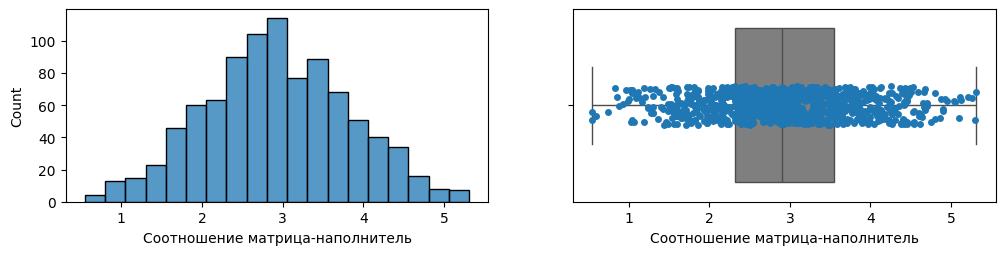

Плотность, кг/м3: 3s=0 iq=0


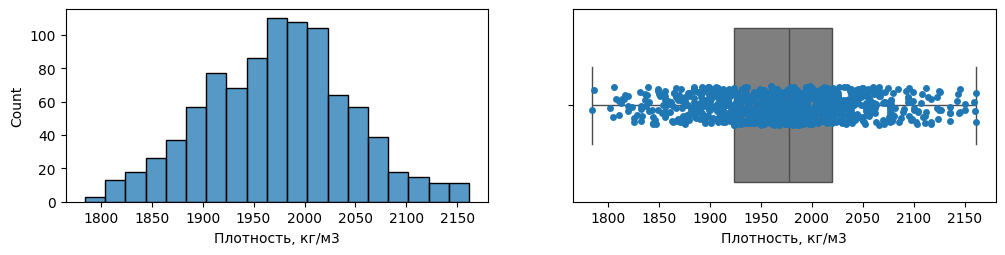

модуль упругости, ГПа: 3s=0 iq=0


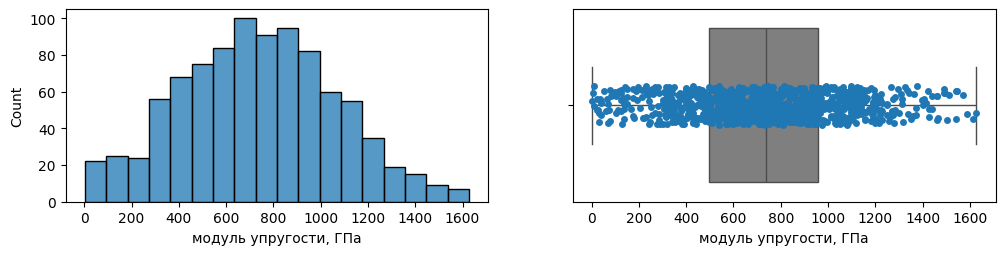

Количество отвердителя, м.%: 3s=0 iq=0


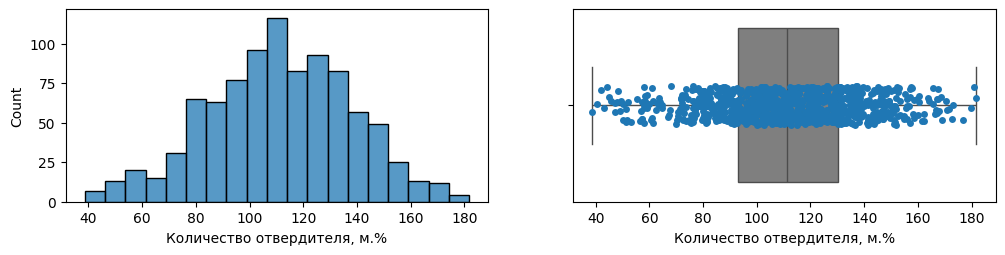

Содержание эпоксидных групп,%_2: 3s=0 iq=0


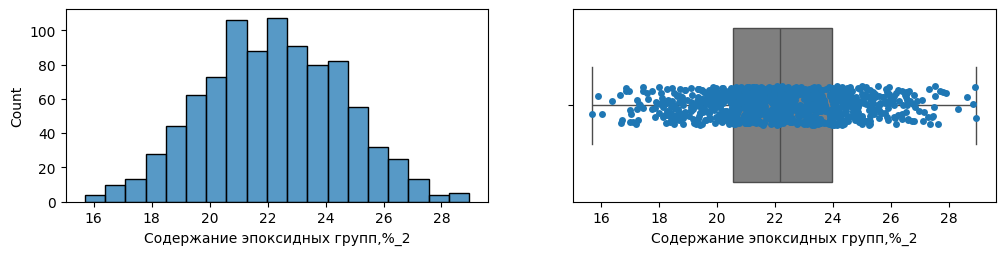

Температура вспышки, С_2: 3s=0 iq=0


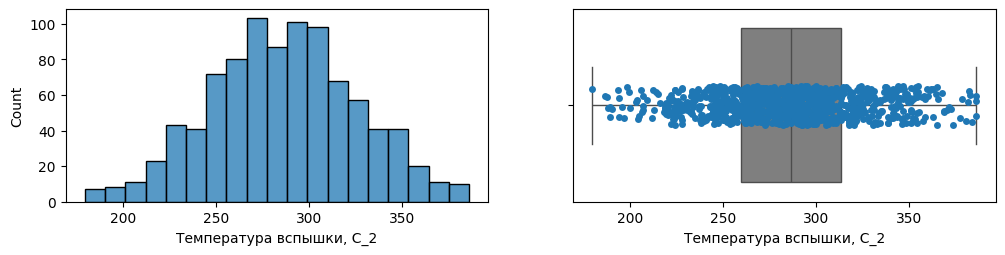

Поверхностная плотность, г/м2: 3s=0 iq=0


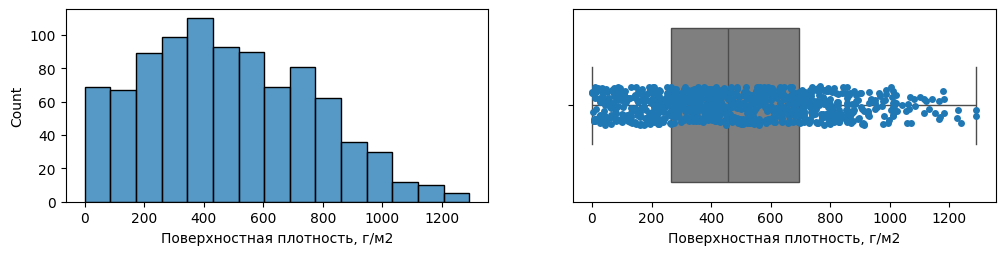

Модуль упругости при растяжении, ГПа: 3s=0 iq=0


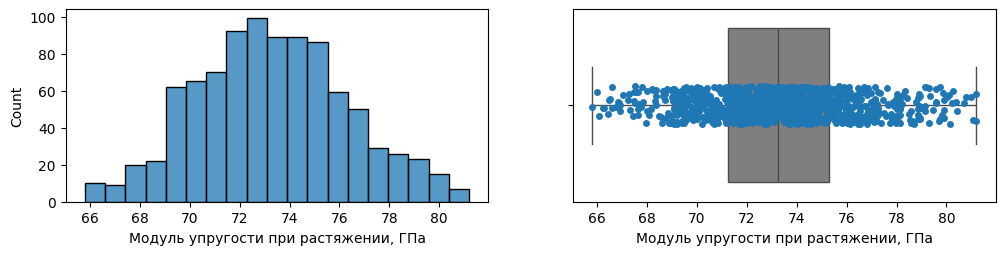

Прочность при растяжении, МПа: 3s=0 iq=0


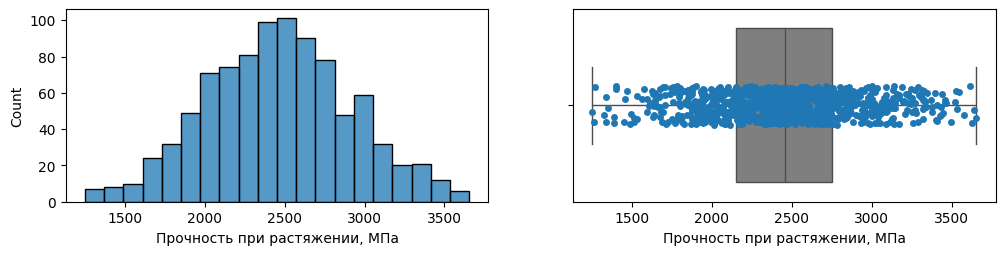

Потребление смолы, г/м2: 3s=0 iq=0


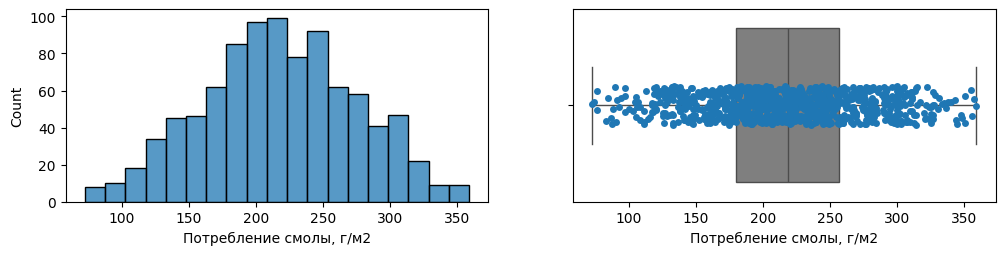

Угол нашивки, град: 3s=0 iq=0


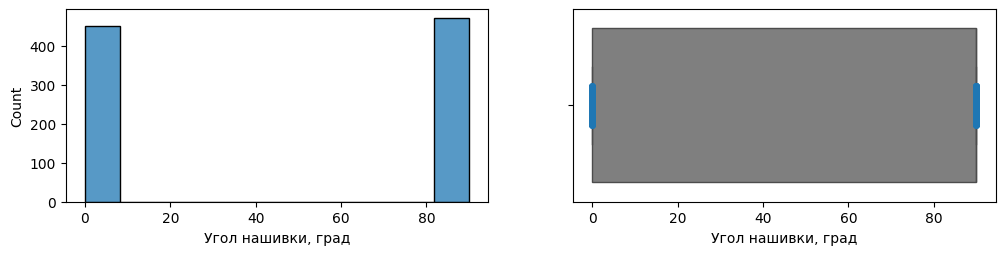

Шаг нашивки: 3s=0 iq=0


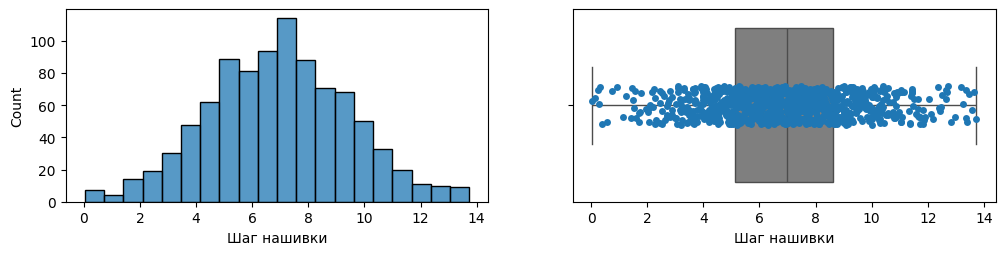

Плотность нашивки: 3s=0 iq=0


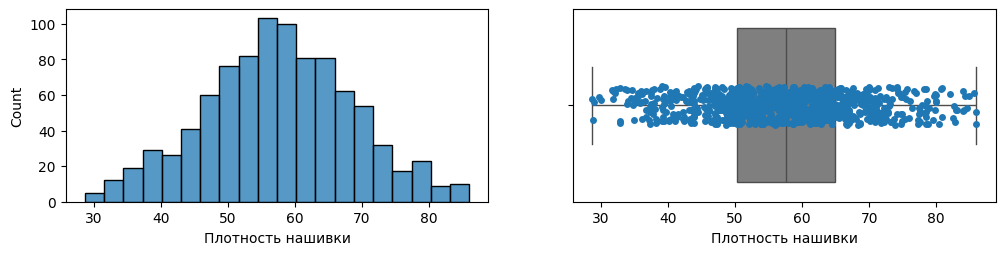

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 0


In [30]:
#Построим "ящики с усами" еще раз и наблюдаем все еще наличие выбросов
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

In [31]:
df.shape

(922, 13)

Выбросов нет. Остается в моделирования 922 строки.

После удаления выбросов.

In [32]:
# Очищенные данные тоже стоит сохранить
df.to_excel(data_path + 'data_cleaned.xlsx')

По внешнему виду графиков не видно никаких зависимостей между признаками. То, что входные переменные независимы друг от друга - это хорошо. Но выходые переменные должны как-то зависеть от входных, чтобы модель могла найти эту зависимость и использовать ее для предсказания. Построим матрицу корреляции. Чтобы посмотреть как изменились зависимости, после удаления выбросов.

<Axes: >

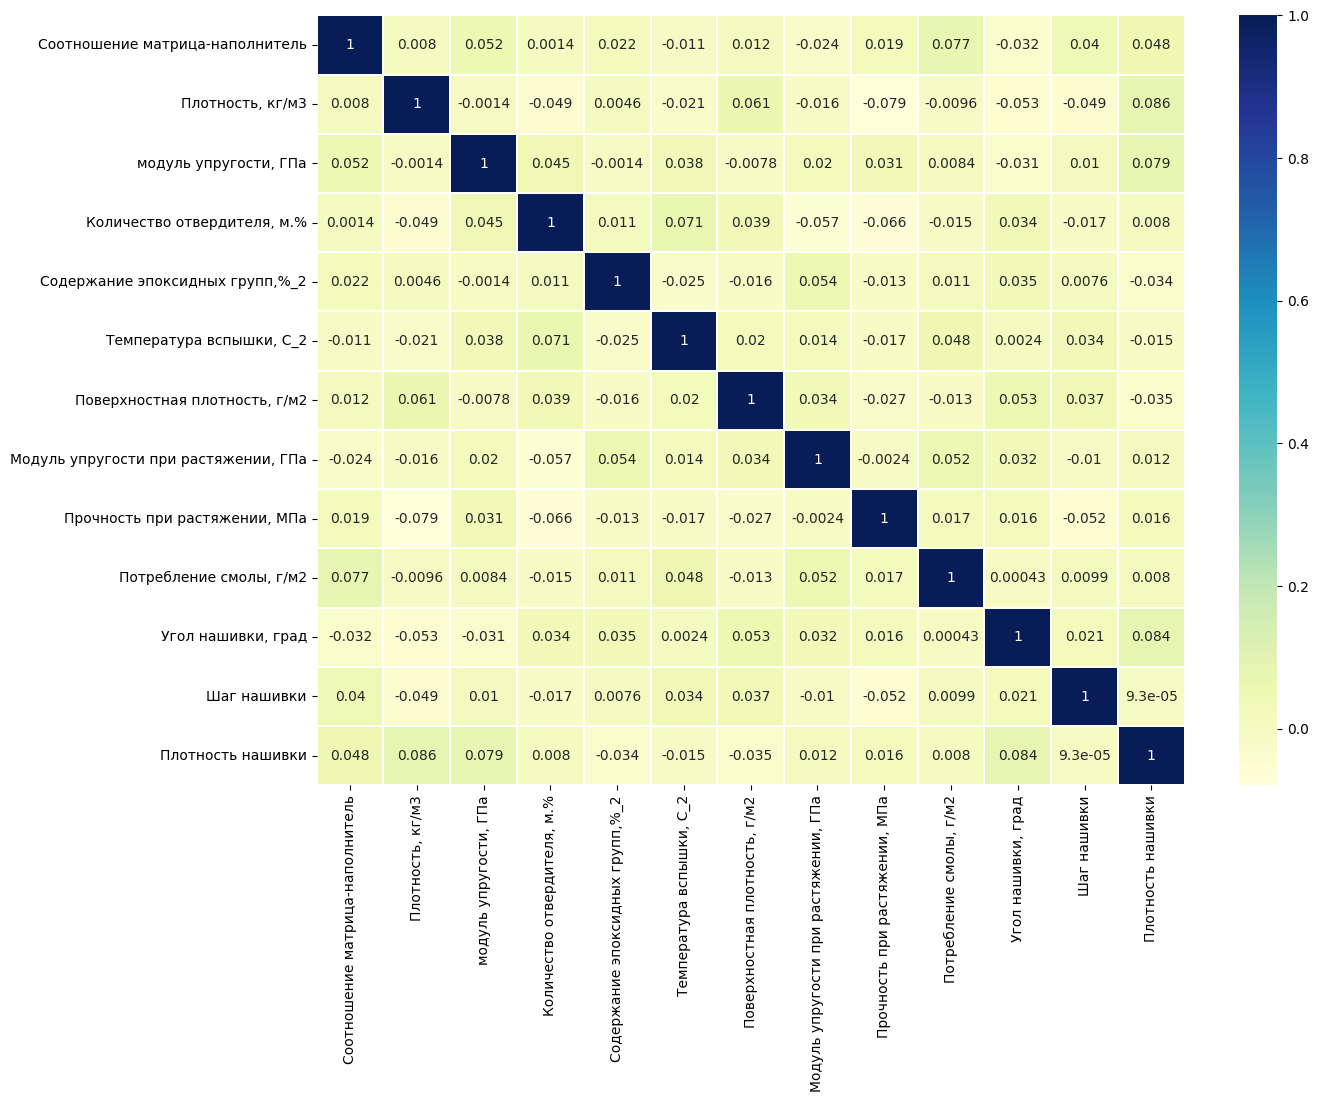

In [33]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(14, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)

Как видим по графику, в результате удаления выбросов, корреляция изменилась не значительно. Существенных изменений нет, корреляция между признаками по-прежнему, фактически отсутствует. Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Можно предположить, что применение линейных моделей регрессии не даст приемлемого результата.

## Обучить нескольких моделей

В этом разделе необходимо:
* 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
* Провести предобработку данных (нормализация и т.д.).
* При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 

In [34]:
# Признаки для 1-й задачи
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [35]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [36]:
# Признаки для 2-й задачи
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [37]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [38]:
# Признаки для 3-й задачи
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [39]:
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

### Препроцессинг

Далее необходимо выполнить препроцессинг. Его необходимо выполнять после разделения на тренировочную и тестовую выборку, как будто мы не знаем параметров тестовой выборки (минимум, максимум, матожидание, стандартное отклонение). 

Препроцессинг для категориальных и количественных признаков выполняем по-разному.

Категориальный признак один - 'Угол нашивки, град'. Он принимает значения 0 и 90. Использую OrdinalEncoder, чтобы признак принимал значения 0 и 1.

Вещественных количественных признаков у нас большинство. Можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Использую стандартизацию и StandardScaler.

Также препроцессинг необходимо повторить в приложении для введенных данных. Поэтому удобно реализовать предварительную обработку с помощью ColumnTransformer. Создам объект preprocessor для каждой из 3-х задач.

Выходные переменные никак не изменяю.

In [40]:
# Разделю переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

In [41]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [42]:
# Препроцессор для 2-й задачи
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [43]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [44]:
# Необходимо сравнить распределения признаков до и после обработки
# Сделаю вспомогательную функцию, чтобы описательная статистика отображалась одинаково
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

### Выбор модели

Какую модель использовать? Нужно попробовать разные. Для сравнения моделей использую несколько метрик. Для статистической устойчивости результатов использую кросс-валидацию. Оформлю запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.

In [45]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring, n_jobs=-1)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = -scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = -scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = -scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

Для поиска параметров по сетке тоже сделаю вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.

In [46]:
def run_grid_search(model, params, x, y, scoring='neg_mean_absolute_error'):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring, n_jobs=-1, error_score='raise', verbose=1)
    searcher.fit(x, y)
     # Создаём DataFrame с результатами
    results = pd.DataFrame(searcher.cv_results_)
    results = results[['params', 'mean_test_score', 'rank_test_score']].copy()
    results.rename(columns={'mean_test_score': 'MAE', 'rank_test_score': 'rank'}, inplace=True)
    results['MAE'] = -results['MAE']  # возвращаем в положительные значения
    return results.sort_values('rank'), searcher.best_estimator_

И еще одна вспомогательная функция для получения метрик предсказания.

In [47]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = np.sqrt(metrics.mean_squared_error(y, y_pred))
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred)
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred)
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred)
    return stat

Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.

### Модель для модуля упругости при растяжении, ГПа

In [48]:
# Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (645, 11) y1_train: (645, 1)
x1_test: (277, 11) y1_test: (277, 1)


In [49]:
# Выполняю препроцессинг входных переменных
x1_train = preprocessor1.fit_transform(x1_train_raw)
x1_test = preprocessor1.transform(x1_test_raw)

In [50]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [51]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

In [52]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

In [53]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y1_train, columns=y1_columns))

In [54]:
# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не оказалась подходящей  для наших данных. 

Коэффициент детерминации R2 близок к 0 для линейных моделей, при этом по методу LASSO он совпал со значением, полученным из базовой модели DummyRegressor. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений, метод ближайших соседей и градиентный бустинг.

Случайный лес отработал лучше, чем одно дерево решений и чуть лучше, чем метод опорных векторов, но хуже, чем линейные модели.

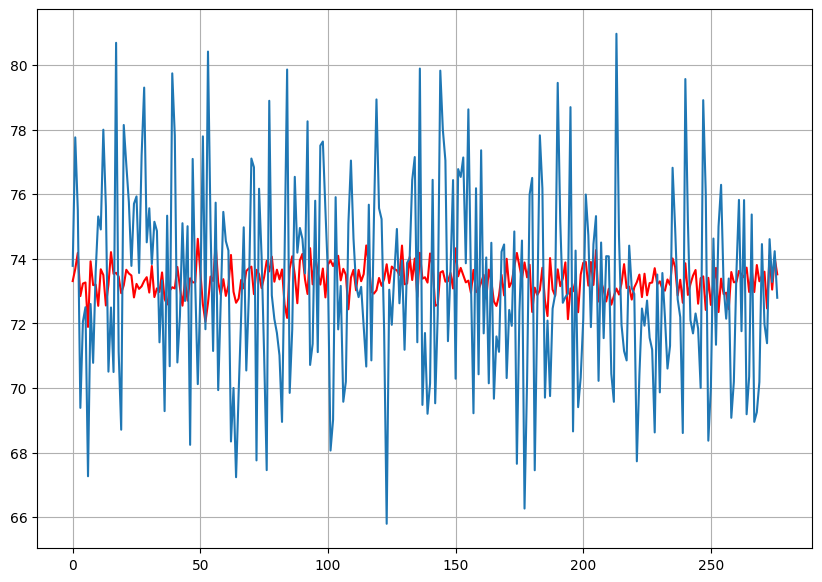

In [55]:
#построение модели и вузуализация
lr = LinearRegression()
lr.fit(x1_train, y1_train)
y_pred_lr = lr.predict(x1_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_lr, "r", label="prediction")
plt.plot(y1_test, label="actual")
plt.grid(True);

In [56]:
# Приступаем к поиску лучших моделей
s_models1 = {}

In [57]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [58]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


params       MAE  rank
819  {'alpha': 700, 'positive': True, 'solver': 'lbfgs'}  2.432033     1

In [59]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [60]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


params       MAE  rank
6  {'alpha': 0.15}  2.429802     1

In [61]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [62]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 18 candidates, totalling 180 fits


params     MAE  rank
10  {'C': 0.02, 'kernel': 'rbf'}  2.4373     1

In [63]:
# Попробую подобрать параметры для KNeighborsRegressor
#
# n_neighbors, default=5
# Number of neighbors to use by default for kneighbors queries.

In [64]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 14 candidates, totalling 140 fits


params       MAE  rank
13  {'n_neighbors': 29}  2.493132     1

In [65]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [66]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


params  \
1    {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 1, 'random_state': 3128, 'splitter': 'random'}   
61    {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 1, 'random_state': 3128, 'splitter': 'random'}   
181        {'criterion': 'poisson', 'max_depth': 1, 'max_features': 1, 'random_state': 3128, 'splitter': 'random'}   

          MAE  rank  
1    2.426078     1  
61   2.426078     1  
181  2.426078     1

In [67]:
# Попробую подобрать параметры для RandomForestRegressor
#
# n_estimators
# The number of trees in the forest.
#
# criterion {“squared_error”, “absolute_error”, “poisson”}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split
#
# bootstrap
# Whether bootstrap samples are used when building trees

In [68]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

Fitting 10 folds for each of 24 candidates, totalling 240 fits


params  \
13  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 1, 'n_estimators': 100, 'random_state': 3128}   

         MAE  rank  
13  2.461833    10

In [69]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

Можно сделать вывод, что подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели. 

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели. 

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при кропотливом подборе параметров отстают по результатам от линейных моделей, они по-прежнему не являются объясняющей зависимость моделью.

Собирая деревья в ансамбли, можно еще улучшить характеристики. Но подбор параметров затруднен тем, что это затратный по времени процесс. Не удалось получить комбинацию параметров для леса, которая была был лучше дерева решений.

In [70]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [71]:
# Предсказание лучшей модели
best_model1 = Ridge(alpha=700, positive=True, solver='lbfgs')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

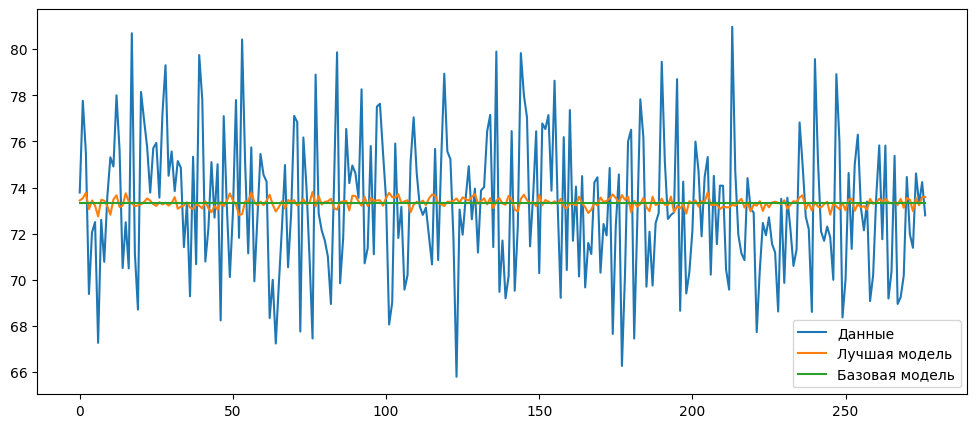

In [72]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сложно визуализировать регрессию в многомерном пространстве. Но даже на таком графике мы видим, насколько не соответствует лучшая модель исходным данным.

In [73]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = pd.concat([compare1, get_metrics('Лучшая модель (Ridge)', y1_test, y1_pred_best)])
compare1

R2      RMSE       MAE      MAPE  max_error
Базовая модель        -0.001840  3.023023  2.480618  0.033942   7.628576
Лучшая модель (Ridge) -0.009474  3.034520  2.475754  0.033873   7.730087

### Модель для прочности при растяжении, МПа

In [74]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (645, 11) y2_train: (645, 1)
x2_test: (277, 11) y2_test: (277, 1)


In [75]:
# Выполняю препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

In [76]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [77]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [78]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

In [79]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y2_train, columns=y2_columns))

In [80]:
# Запускаю различные модели с параметрами по умолчанию
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Метод регрессии опорных векторов с параметрами по умолчанию отработал лучше дерева и чуть лучше базовой модели.

In [81]:
# Приступаем к поиску лучших моделей
s_models2 = {}

In [82]:
# Попробую подобрать параметры для модели Ridge
#
# alpha, default=1.0
# Regularization strength; must be a positive float
#
# solver {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# Solver to use in the computational routines
#
# random_state - только для ‘sag’, ‘saga’
#
# positive - только для ‘lbfgs’

In [83]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 792 candidates, totalling 7920 fits


params         MAE  rank
493  {'alpha': 990, 'solver': 'lsqr'}  366.133785     1

In [84]:
# Попробую подобрать параметры для модели Lasso
#
# alpha, default=1.0
# Constant that multiplies the L1 term. 

In [85]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


params        MAE  rank
4  {'alpha': 20}  365.96081     1

In [86]:
# Попробую подобрать параметры для модели SVR
#
# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
#
# Остальные параметры подходят для разных ядер
#
# C, default=1.0
# Regularization parameter

In [87]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 19 candidates, totalling 190 fits


params         MAE  rank
2  {'C': 0.02, 'kernel': 'linear'}  366.548778     1

In [88]:
# Попробую подобрать параметры для DecisionTreeRegressor
#
# criterion {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}
# The function to measure the quality of a split.
#
# splitter{“best”, “random”}
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [89]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


params  \
4   {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 3, 'random_state': 3128, 'splitter': 'best'}   
64   {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 3, 'random_state': 3128, 'splitter': 'best'}   

           MAE  rank  
4   365.998753     1  
64  365.998753     1

In [90]:
# Попробую подобрать параметры для модели GradientBoostingRegressor
#
# n_estimators
# The number of boosting stages to perform
#
# loss {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
# Loss function to be optimized
#
# criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}
# The function to measure the quality of a split
#
# max_depth
# The maximum depth of the tree
#
# max_features
# The number of features to consider when looking for the best split

In [91]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

Fitting 10 folds for each of 72 candidates, totalling 720 fits


params  \
45  {'loss': 'absolute_error', 'max_depth': 1, 'max_features': 11, 'n_estimators': 50, 'random_state': 3128}   

           MAE  rank  
45  368.817375     1

In [92]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

Так же попробовал несколько линейных моделей и ансамбли. Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь я попробовал GradientBoosting. После подбора параметров он оказался немного лучше остальных моделей. Но по-прежнему крайне плохо описывает исходные данные и не может применяться в рабочем приложении.

Подбор гиперпараметров - интересный процесс. Но нам он не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные модели после подбора немного улучшили характеристики. При этом лучшая модель среди остальных  - при использовании метода Lasso.

Метод опорных векторов отработал чуть хуже линейных моделей.

Деревья решений после подбора параметров улучшили неудачный результат с параметрами по умолчанию.

Хуже результат, чем линейные модели, показал также градиентный бустинг. Значения его ошибок примерно такие же, как у дерева решений.

In [93]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [94]:
# Предсказание лучшей модели
best_model2 = Lasso(alpha=20)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

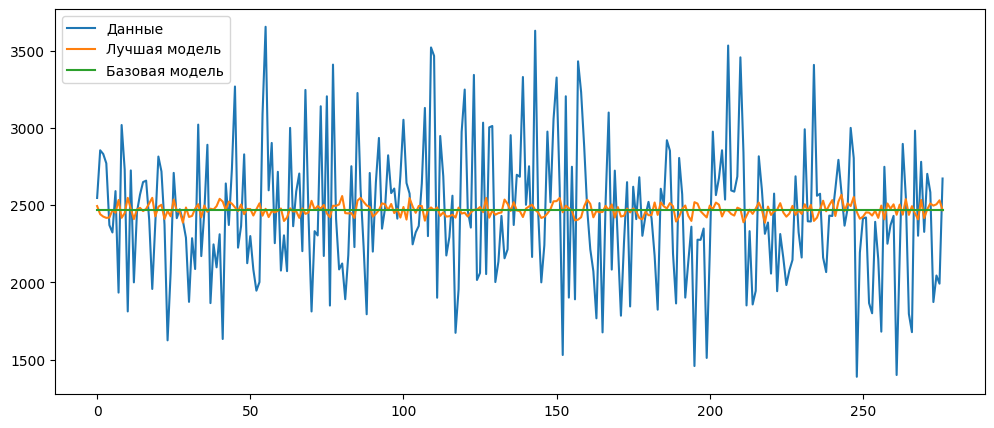

In [95]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Визуализируя результаты линейной модели Lasso с выбранными параметрами, мы видим насколько они плохи и далеки от исходных данных. Результаты выглядят аналогично, как те, которые получены линейным методом Ridge для модуля упругости при растяжении.

In [96]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = pd.concat([compare2, get_metrics('Лучшая модель (Lasso)', y2_test, y2_pred_best)])
compare2

R2        RMSE         MAE      MAPE    max_error
Базовая модель        -0.001555  439.676848  350.354301  0.151168  1187.738138
Лучшая модель (Lasso) -0.011555  441.866376  350.404421  0.151146  1178.211769

### Модель для соотношения матрица-наполнитель

In [97]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (645, 12) y3_train: (645, 1)
x3_test: (277, 12) y3_test: (277, 1)


In [98]:
# Выполняю препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)

In [99]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [100]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [101]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [102]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y3_train, columns=y3_columns))

По заданию для соотношения матрица-наполнитель необходимо построить нейросеть. 

Но базовая модель DummyRegressor, возвращающая среднее, для оценки качества модели тоже понадобится.

In [103]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

In [104]:
# Предсказание базовой модели
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

Попробую модель MLPRegressor из библиотеки sklearn.

In [105]:
from sklearn.neural_network import MLPRegressor

In [106]:
# Настраиваю нейросеть
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [107]:
%%time
# Запускаю нейросеть
model3_1.fit(x3_train, y3_train)

Iteration 1, loss = 2.73419191
Validation score: -5.595757
Iteration 2, loss = 2.45844204
Validation score: -4.837209
Iteration 3, loss = 2.17493009
Validation score: -4.057391
Iteration 4, loss = 1.88540383
Validation score: -3.283985
Iteration 5, loss = 1.60016169
Validation score: -2.525000
Iteration 6, loss = 1.32426438
Validation score: -1.841053
Iteration 7, loss = 1.07325284
Validation score: -1.234437
Iteration 8, loss = 0.85135376
Validation score: -0.670813
Iteration 9, loss = 0.63880843
Validation score: -0.218393
Iteration 10, loss = 0.48257376
Validation score: -0.111920
Iteration 11, loss = 0.46250483
Validation score: -0.333319
Iteration 12, loss = 0.52673301
Validation score: -0.387528
Iteration 13, loss = 0.52406514
Validation score: -0.217254
Iteration 14, loss = 0.46862179
Validation score: -0.079897
Iteration 15, loss = 0.43534385
Validation score: -0.051819
Iteration 16, loss = 0.43419089
Validation score: -0.066820
Iteration 17, loss = 0.43971190
Validation score:

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=3128, validation_fraction=0.3, verbose=True)

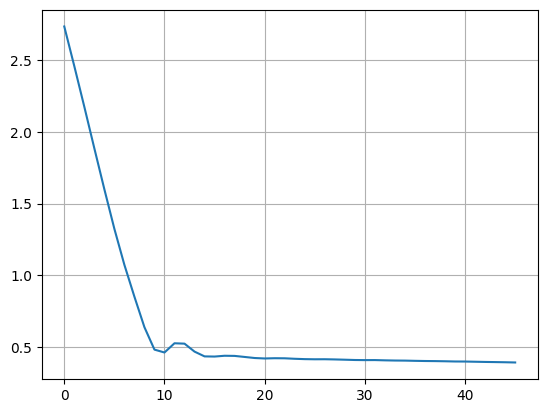

In [108]:
# График ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [109]:
# Предсказание нейросети
y3_pred_skl = model3_1.predict(x3_test)

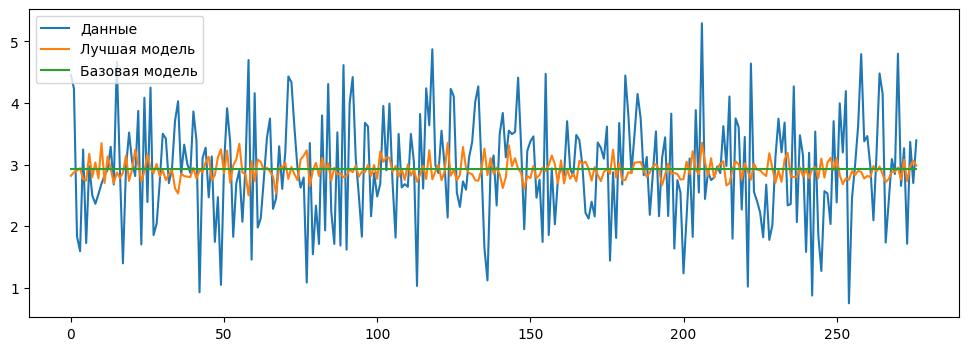

In [110]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='Лучшая модель')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [111]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_1 = pd.concat([compare3_1, get_metrics('MLPRegressor', y3_test, y3_pred_skl)])
compare3_1

R2      RMSE       MAE      MAPE  max_error
DummyRegressor -0.000074  0.868130  0.691547  0.296759   2.370117
MLPRegressor   -0.064119  0.895496  0.722489  0.305808   2.201930

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка  по всем метрикам значительно хуже, чем у базовой модели. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

Попробую построить нейронную сеть с помощью библиотеки TensorFlow.

In [112]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [113]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


In [114]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [115]:
# Собираю нейросеть
model3_2 = construct_model()

In [116]:
# Компилирую нейросеть
model3_2 = compile_model(model3_2)

In [117]:
# Сводная информация по архитектуре сети
model3_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 24)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out (Dense)                          │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,537 (17.72 KB)

 Trainable params: 4,537 (17.72 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# Архитектура нейросети визуально
keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [120]:
%%time
#Обучение нейросети
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 96.3556 - root_mean_squared_error: 2.9758 - val_loss: 89.1159 - val_root_mean_squared_error: 2.8030
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 73.7634 - root_mean_squared_error: 2.4278 - val_loss: 42.4980 - val_root_mean_squared_error: 1.6360
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 40.5266 - root_mean_squared_error: 1.3054 - val_loss: 36.7721 - val_root_mean_squared_error: 1.2230
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 35.0108 - root_mean_squared_error: 1.2391 - val_loss: 33.6894 - val_root_mean_squared_error: 1.2286
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 32.4720 - root_mean_squared_error: 1.1062 - val_loss: 33.2940 - val_root_mean_squared_error: 1.1166
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31.5068 - root_mean_squared_error: 1.0499 - val_loss: 32.2275 - val_root_mean_squared_error: 1.1244
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

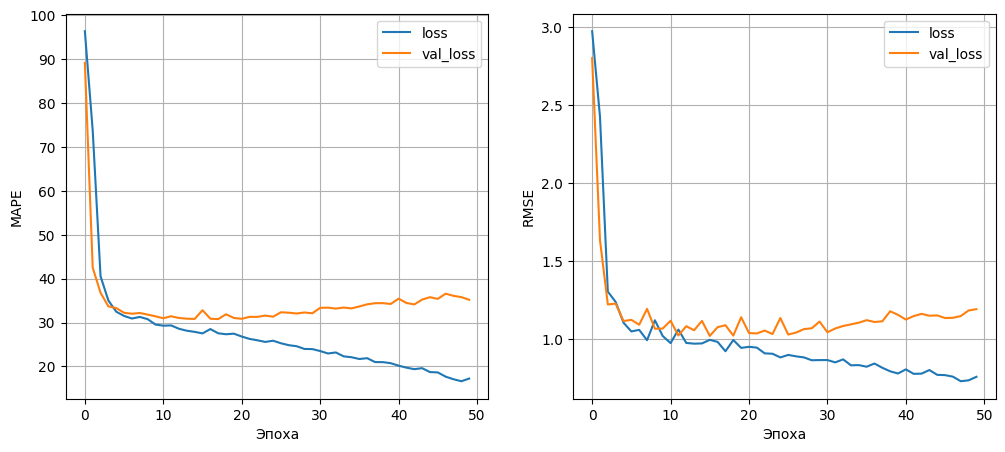

In [121]:
plot_loss(history.history)

In [122]:
# Проверяем точность нейросети на тестовых данных
model3_2.evaluate(x3_test, y3_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.1797 - root_mean_squared_error: 1.1746 


[36.179718017578125, 1.1745848655700684]

In [123]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


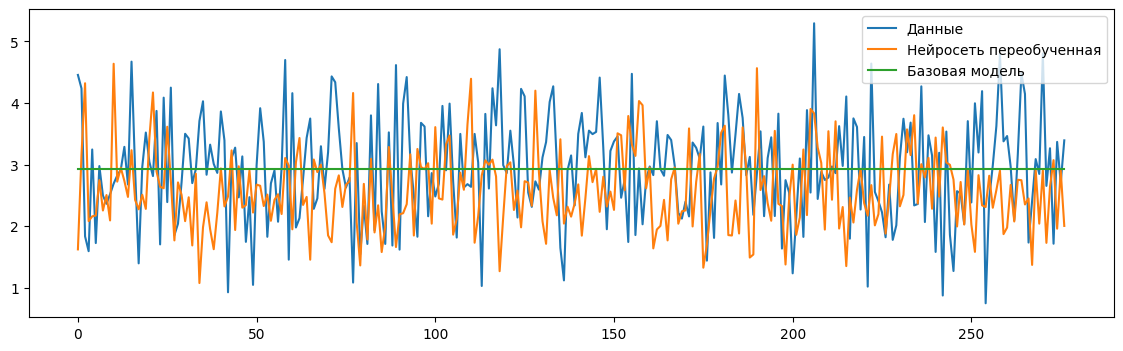

In [124]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Попробуем раннюю остановку процесса обучения для борьбы с переобучением

In [125]:
# Создаем модель с той же архитектурой
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

In [126]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 95.1206 - root_mean_squared_error: 2.9441 - val_loss: 86.0991 - val_root_mean_squared_error: 2.7278
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.9999 - root_mean_squared_error: 2.3143 - val_loss: 42.8703 - val_root_mean_squared_error: 1.6086
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 40.4437 - root_mean_squared_error: 1.3364 - val_loss: 37.5873 - val_root_mean_squared_error: 1.2268
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37.0783 - root_mean_squared_error: 1.2269 - val_loss: 34.5695 - val_root_mean_squared_error: 1.2715
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 34.5126 - root_mean_squared_error: 1.1880 - val_loss: 33.3330 - val_root_mean_squared_error: 1.0800
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33.1535 - root_mean_squared_error: 1.0734 - val_loss: 32.5210 - val_root_mean_squared_error: 1.1854
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/

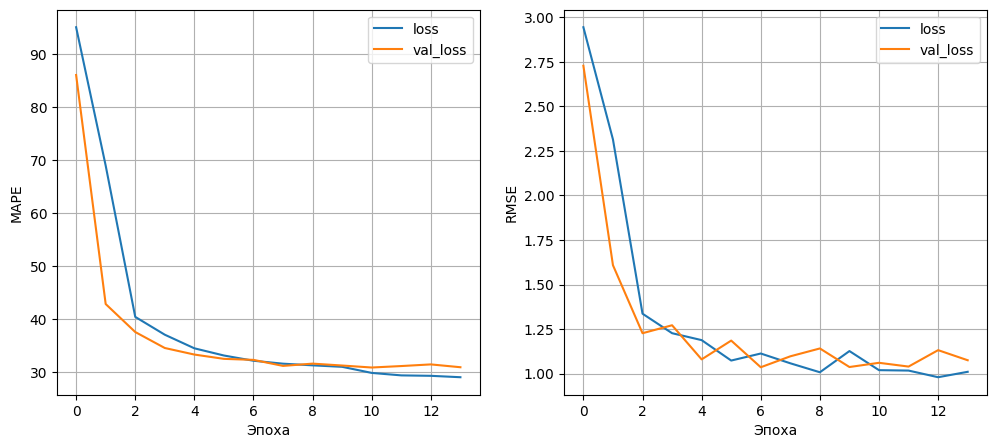

In [127]:
plot_loss(history.history)

In [128]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.1427 - root_mean_squared_error: 1.0498 


[31.142669677734375, 1.0498226881027222]

In [129]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


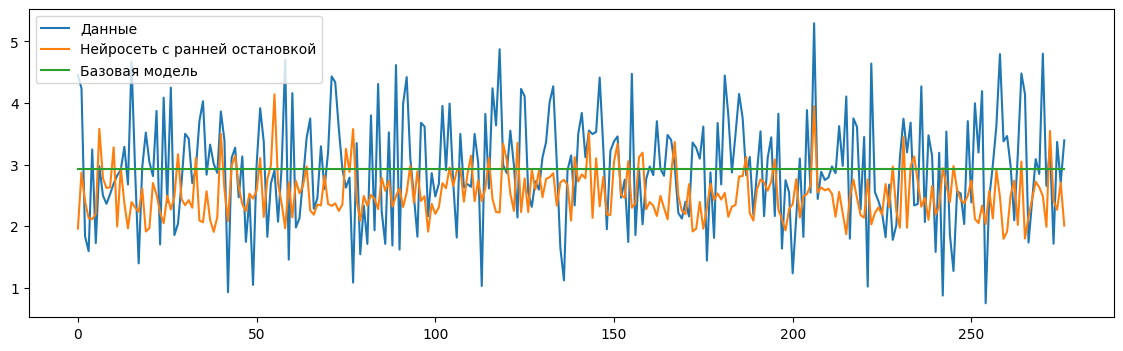

In [130]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Еще одним методом борьбы с переобучением является добавление Dropout-слоя.

In [131]:
# Построение аналогичной модели с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [132]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [133]:
# Архитектура изменилась
model3_4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 24)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out (Dense)                          │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,537 (17.72 KB)

 Trainable params: 4,537 (17.72 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
%%time
#Обучение нейросети
history = model3_4.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 96.1111 - root_mean_squared_error: 2.9706 - val_loss: 88.3434 - val_root_mean_squared_error: 2.7852
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 75.8345 - root_mean_squared_error: 2.4783 - val_loss: 49.7429 - val_root_mean_squared_error: 1.8568
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 42.5291 - root_mean_squared_error: 1.4801 - val_loss: 36.6866 - val_root_mean_squared_error: 1.2208
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37.9641 - root_mean_squared_error: 1.3129 - val_loss: 34.7594 - val_root_mean_squared_error: 1.3091
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36.9307 - root_mean_squared_error: 1.3205 - val_loss: 33.8442 - val_root_mean_squared_error: 1.2424
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 33.9429 - root_mean_squared_error: 1.2002 - val_loss: 33.1897 - val_root_mean_squared_error: 1.1947
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

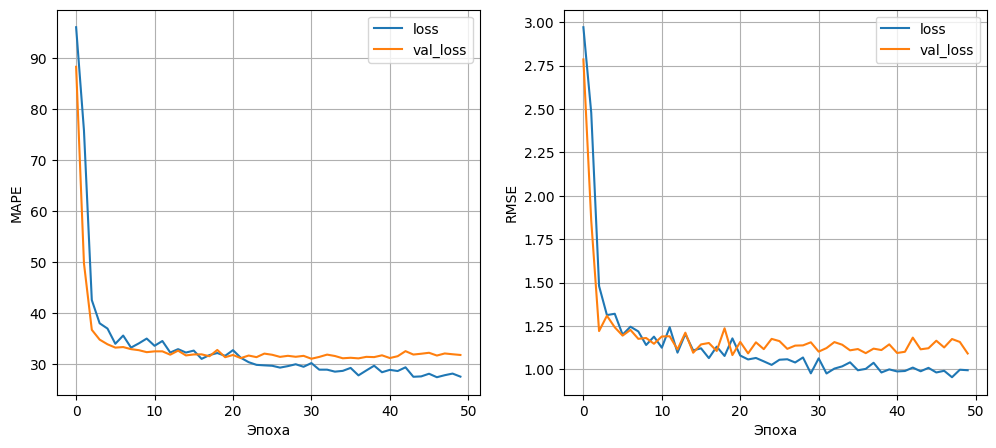

In [135]:
plot_loss(history.history)

In [136]:
# Проверяем точность нейросети на тестовых данных
model3_4.evaluate(x3_test, y3_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.0578 - root_mean_squared_error: 1.0521 


[31.057754516601562, 1.0520588159561157]

In [137]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(x3_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


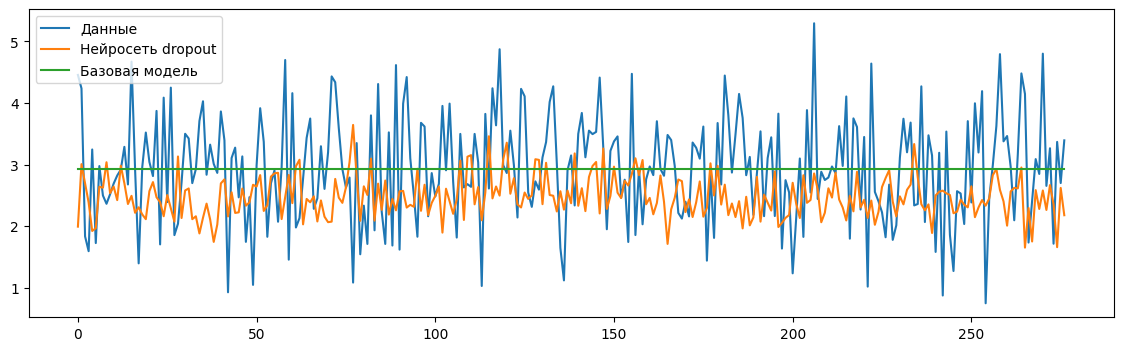

In [138]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [139]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = pd.concat([compare3_2, get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2)])
compare3_2 = pd.concat([compare3_2, get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3)])
compare3_2 = pd.concat([compare3_2, get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4)])
compare3_2

R2      RMSE       MAE      MAPE  \
DummyRegressor                -0.000074  0.868130  0.691547  0.296759   
Нейросеть переобученная       -0.830760  1.174585  0.957319  0.361797   
Нейросеть с ранней остановкой -0.462496  1.049823  0.847659  0.311427   
Нейросеть dropout             -0.468733  1.052059  0.856727  0.310578   

                               max_error  
DummyRegressor                  2.370117  
Нейросеть переобученная         3.604231  
Нейросеть с ранней остановкой   2.732753  
Нейросеть dropout               2.559960

Нейросеть из библиотеки tensorflow старалась подстроиться к данным. Выглядят результаты «похоже» и красиво, но метрики разочаровывают. Лучшая обобщающая спрособность и меньшие значения ошибок на тестовом множестве оказались у нейросети, обученной с ранней остановкой. Но она тоже предсказывает гораздо хуже базовой модели.

## Оценить точность модели на тренировочном и тестовом датасете

In [140]:
## Модель для модуля упругости при растяжении
best_model1

Ridge(alpha=700, positive=True, solver='lbfgs')

In [141]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.013531  3.004559  2.419611  0.033056   
Модуль упругости, тестовый      -0.009474  3.034520  2.475754  0.033873   

                                 max_error  
Модуль упругости, тренировочный   7.680848  
Модуль упругости, тестовый        7.730087

Метод Ridge имеет ошибку на тренировочном датасете меньше, чем на тестовом, потому что чему-то все-таки оно научилось. Но даже на тренировочном датасете оно не нашло закономерности во входных данных.

In [142]:
## Модель для прочности при растяжении
best_model2

Lasso(alpha=20)

In [143]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE  \
Прочность при растяжении, тренировочный  0.018043  454.934526  363.717442   
Прочность при растяжении, тестовый      -0.011555  441.866376  350.404421   

                                             MAPE    max_error  
Прочность при растяжении, тренировочный  0.159240  1295.547126  
Прочность при растяжении, тестовый       0.151146  1178.211769

Метод Lasso показал положительный, хоть и близкий к 0 коэффициент детерминации. Ошибка на тестовом множестве незначительно меньше, чем на тренировочном. В то же время коэффициент детерминации на тестовом датасете отрицательный в отличие от положительного значения тренировочного датасета, хотя оба показателя блики к нулю.

In [144]:
## Модель для соотношения матрица-наполнитель
model3_3

<Sequential name=sequential_1, built=True>

In [145]:
result3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


R2      RMSE       MAE  \
Соотношение матрица-наполнитель, тренировочный -0.278531  1.024750  0.805735   
Соотношение матрица-наполнитель, тестовый      -0.462496  1.049823  0.847659   

                                                    MAPE  max_error  
Соотношение матрица-наполнитель, тренировочный  0.292013   3.013253  
Соотношение матрица-наполнитель, тестовый       0.311427   2.732753

У нейросети показатели для тестовой выборки сильнее отличаются в худшую сторону от показателей тренировочной. Она не нашла закономерностей, а стала учить данные из тестовой выборки.

## Разработать приложение 

Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 1 или 2 (один или два прогноза, на выбор учащегося).

Решено разработать веб-приложение с помощью языка Python, фреймворка Flask и шаблонизатора Jinja.

Для использования в приложении обученных моделей их надо сохранить. Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.

In [146]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [147]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [148]:
save_object_with_pickle(preprocessor1, 'preprocessor1')

In [149]:
save_object_with_pickle(best_model1, 'model1_best')

In [150]:
save_object_with_pickle(preprocessor2, 'preprocessor2')

In [151]:
save_object_with_pickle(best_model2, 'model2_best')

In [152]:
save_object_with_pickle(preprocessor3, 'preprocessor3')

In [153]:
save_object_with_pickle(model3_1, 'model3_1')

In [159]:
model3_2.save(models_path + 'model3_2/model3_2.keras')

In [161]:
model3_3.save(models_path + '/model3_3/model3_3.keras')

In [162]:
model3_4.save(models_path + '/model3_4/model3_4.keras')

In [163]:
# Проверяю загрузку

In [164]:
preprocessor1 = load_object_with_pickle('preprocessor1')
best_model1 = load_object_with_pickle('model1_best')
best_model1

Ridge(alpha=700, positive=True, solver='lbfgs')

In [165]:
preprocessor2 = load_object_with_pickle('preprocessor2')
best_model2 = load_object_with_pickle('model2_best')
best_model2

Lasso(alpha=20)

In [166]:
preprocessor3 = load_object_with_pickle('preprocessor3')
model3_1 = load_object_with_pickle('model3_1')
model3_1

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=3128, validation_fraction=0.3, verbose=True)

In [167]:
model3_2 = keras.models.load_model(models_path + '/model3_2/model3_2.keras')
model3_2

<Sequential name=sequential, built=True>

In [168]:
model3_3 = keras.models.load_model(models_path + '/model3_3/model3_3.keras')
model3_3

<Sequential name=sequential_1, built=True>

In [169]:
model3_4 = keras.models.load_model(models_path + '/model3_4/model3_4.keras')
model3_4

<Sequential name=sequential_2, built=True>

In [170]:
# В приложение буду встраивать нейросеть, полученную с помощью MLPRegressor.
# Хоть она по метрикам чуть хуже нейросети, полученной с помощью tensorflow, но не будет проблем с размещением на Render.com
# Поэтому использую MLPRegressor и проверю работоспособность приложения

In [171]:
# Примеры для тестирования модели в приложении для задач 1 и 2

In [172]:
# Вход
x1.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [173]:
# Выход
sample_x = preprocessor1.transform(x1.iloc[[19], :])
best_model1.predict(sample_x)

array([73.36065714])

In [174]:
# Вход
x2.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [175]:
# Выход
sample_x = preprocessor2.transform(x2.iloc[[19], :])
best_model2.predict(sample_x)

array([2497.28651427])

In [176]:
# Примеры для тестирования модели в приложении для задачи 3

In [177]:
# Вход
x3.iloc[19, :].values.astype(str)

array(['1880.0', '622.0', '111.86', '22.2678571428571',
       '284.615384615384', '470.0', '73.3333333333333',
       '2455.55555555555', '220.0', '90.0', '4.0', '60.0'], dtype='<U32')

In [178]:
# Выход
sample_x = preprocessor3.transform(x3.iloc[[19], :])
model3_1.predict(sample_x)

array([2.53207433])